<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task:-Maintenance-cost-reduction-through-predictive-techniques" data-toc-modified-id="Task:-Maintenance-cost-reduction-through-predictive-techniques-1">Task: Maintenance cost reduction through predictive techniques</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2">Summary</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-3">Load Data</a></span></li><li><span><a href="#Data-Profile" data-toc-modified-id="Data-Profile-4">Data Profile</a></span><ul class="toc-item"><li><span><a href="#Feature-transformation" data-toc-modified-id="Feature-transformation-4.1">Feature transformation</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5">EDA</a></span><ul class="toc-item"><li><span><a href="#Distribution-plots" data-toc-modified-id="Distribution-plots-5.1">Distribution plots</a></span></li><li><span><a href="#Box-plot" data-toc-modified-id="Box-plot-5.2">Box plot</a></span></li><li><span><a href="#Date-Time-relationship" data-toc-modified-id="Date-Time-relationship-5.3">Date-Time relationship</a></span></li></ul></li><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-6">Data preperation</a></span><ul class="toc-item"><li><span><a href="#Data-splitting" data-toc-modified-id="Data-splitting-6.1">Data splitting</a></span></li><li><span><a href="#Converting-categorial-features" data-toc-modified-id="Converting-categorial-features-6.2">Converting categorial features</a></span></li><li><span><a href="#Data-standarisation-for-LinearRegression" data-toc-modified-id="Data-standarisation-for-LinearRegression-6.3">Data standarisation for LinearRegression</a></span></li><li><span><a href="#Oversampling-minority-class" data-toc-modified-id="Oversampling-minority-class-6.4">Oversampling minority class</a></span></li></ul></li><li><span><a href="#Class-Definitions" data-toc-modified-id="Class-Definitions-7">Class Definitions</a></span><ul class="toc-item"><li><span><a href="#Classifier-class-definition" data-toc-modified-id="Classifier-class-definition-7.1">Classifier class definition</a></span></li><li><span><a href="#Plot-class-definition" data-toc-modified-id="Plot-class-definition-7.2">Plot class definition</a></span></li><li><span><a href="#Hyberparameter-class-definition-(Grid+Baysian-search)" data-toc-modified-id="Hyberparameter-class-definition-(Grid+Baysian-search)-7.3">Hyberparameter class definition (Grid+Baysian search)</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-8">Modelling</a></span><ul class="toc-item"><li><span><a href="#LinearRegression-with-SMOTENC-Oversampling-(All-features)" data-toc-modified-id="LinearRegression-with-SMOTENC-Oversampling-(All-features)-8.1">LinearRegression with SMOTENC Oversampling (All features)</a></span></li><li><span><a href="#LinearRegression-with-ADASYN-Oversampling-(Numeric-features)" data-toc-modified-id="LinearRegression-with-ADASYN-Oversampling-(Numeric-features)-8.2">LinearRegression with ADASYN Oversampling (Numeric features)</a></span></li><li><span><a href="#XGBoost-with-ADASYN-Oversampling-(Numerial-features)" data-toc-modified-id="XGBoost-with-ADASYN-Oversampling-(Numerial-features)-8.3">XGBoost with ADASYN Oversampling (Numerial features)</a></span><ul class="toc-item"><li><span><a href="#Calibiration-of-probabilities" data-toc-modified-id="Calibiration-of-probabilities-8.3.1">Calibiration of probabilities</a></span></li><li><span><a href="#Prediction-on-oversampled-test-data" data-toc-modified-id="Prediction-on-oversampled-test-data-8.3.2">Prediction on oversampled test data</a></span></li></ul></li><li><span><a href="#XGBoost-with-SMOTENC-Oversampling-(All-features)" data-toc-modified-id="XGBoost-with-SMOTENC-Oversampling-(All-features)-8.4">XGBoost with SMOTENC Oversampling (All features)</a></span></li></ul></li><li><span><a href="#XGBoost-with-SMOTENC-Oversampling-(metrics-+-day-of-week-features)" data-toc-modified-id="XGBoost-with-SMOTENC-Oversampling-(metrics-+-day-of-week-features)-9">XGBoost with SMOTENC Oversampling (metrics + day of week features)</a></span></li><li><span><a href="#SageMaker-Implementation" data-toc-modified-id="SageMaker-Implementation-10">SageMaker Implementation</a></span></li></ul></div>

## Task: Maintenance cost reduction through predictive techniques
BACKGROUND
A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive
maintenance solution to proactively identify when maintenance should be performed. This approach promises cost
savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.


GOAL
You are tasked with building a predictive model using machine learning to predict the probability of a device failure.
When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict
is called failure with binary value 0 for non-failure and 1 for failure.


DATA
Download link: http://aws-proserve-data-science.s3.amazonaws.com/predictive_maintenance.csv

## Summary

The problem is unbalanced dataset classification. Different techniques have been used in the solution including,
standarisation/normalisation, categorial encoding (onehot, target encoding), hyberparameter optimisation using grid/baysian optimisation, oversampling
(SMOTE, SMOTENC, ADASYN) and classifier probability calibration.
LogisticRegression was used as a baseline model, however it suffered from overfitting and needed further more work. 
The best solution obtained is using Xgboost + ADASYN.


In [1]:
#Basic libraries
import pandas as pd
import numpy as np
import datetime

#Graphic libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#Quick EDA
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

## Load Data

In [2]:
data_df = pd.read_csv('./data/predictive_maintenance.csv', parse_dates=["date"])

## Data Profile

In [4]:
#pandas_profiling.ProfileReport(data_df.reset_index(), check_correlation=True)
pandas_profiling.ProfileReport(data_df.reset_index())

### Feature transformation

In [5]:
#Drop correlated features 
data_df = data_df.drop('metric7', axis=1)

In [6]:
#Extract day of week and month
data_df['dayofweek'] = data_df.date.dt.dayofweek
data_df['month'] = data_df.date.dt.month

In [7]:
#numerics metrics
metrics_num = data_df.columns.difference(['date','id','failure','month', 'dayofweek'])

In [77]:
metrics_num

Index(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6',
       'metric8', 'metric9'],
      dtype='object')

## EDA

### Distribution plots

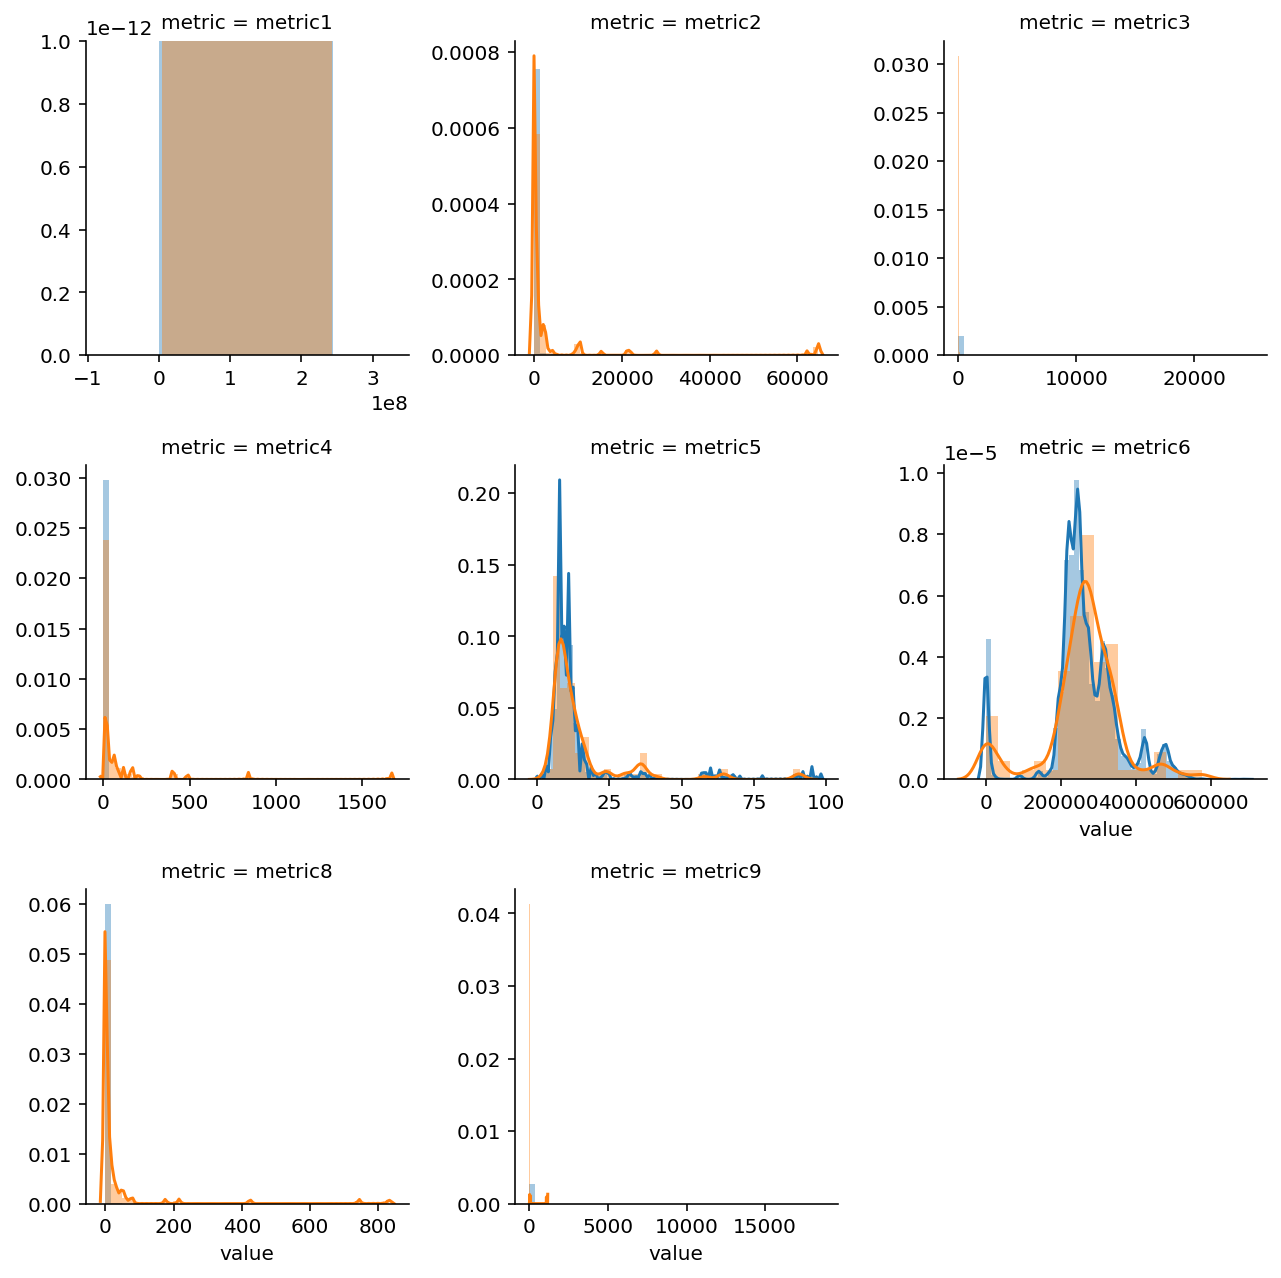

In [8]:
_ = data_df.melt(id_vars=['failure'], value_vars=metrics_num, var_name='metric')
g = sns.FacetGrid(data=_, col = "metric", hue='failure', sharey=False, sharex=False, col_wrap=3)
g.map(sns.distplot, 'value')
plt.show()

### Box plot

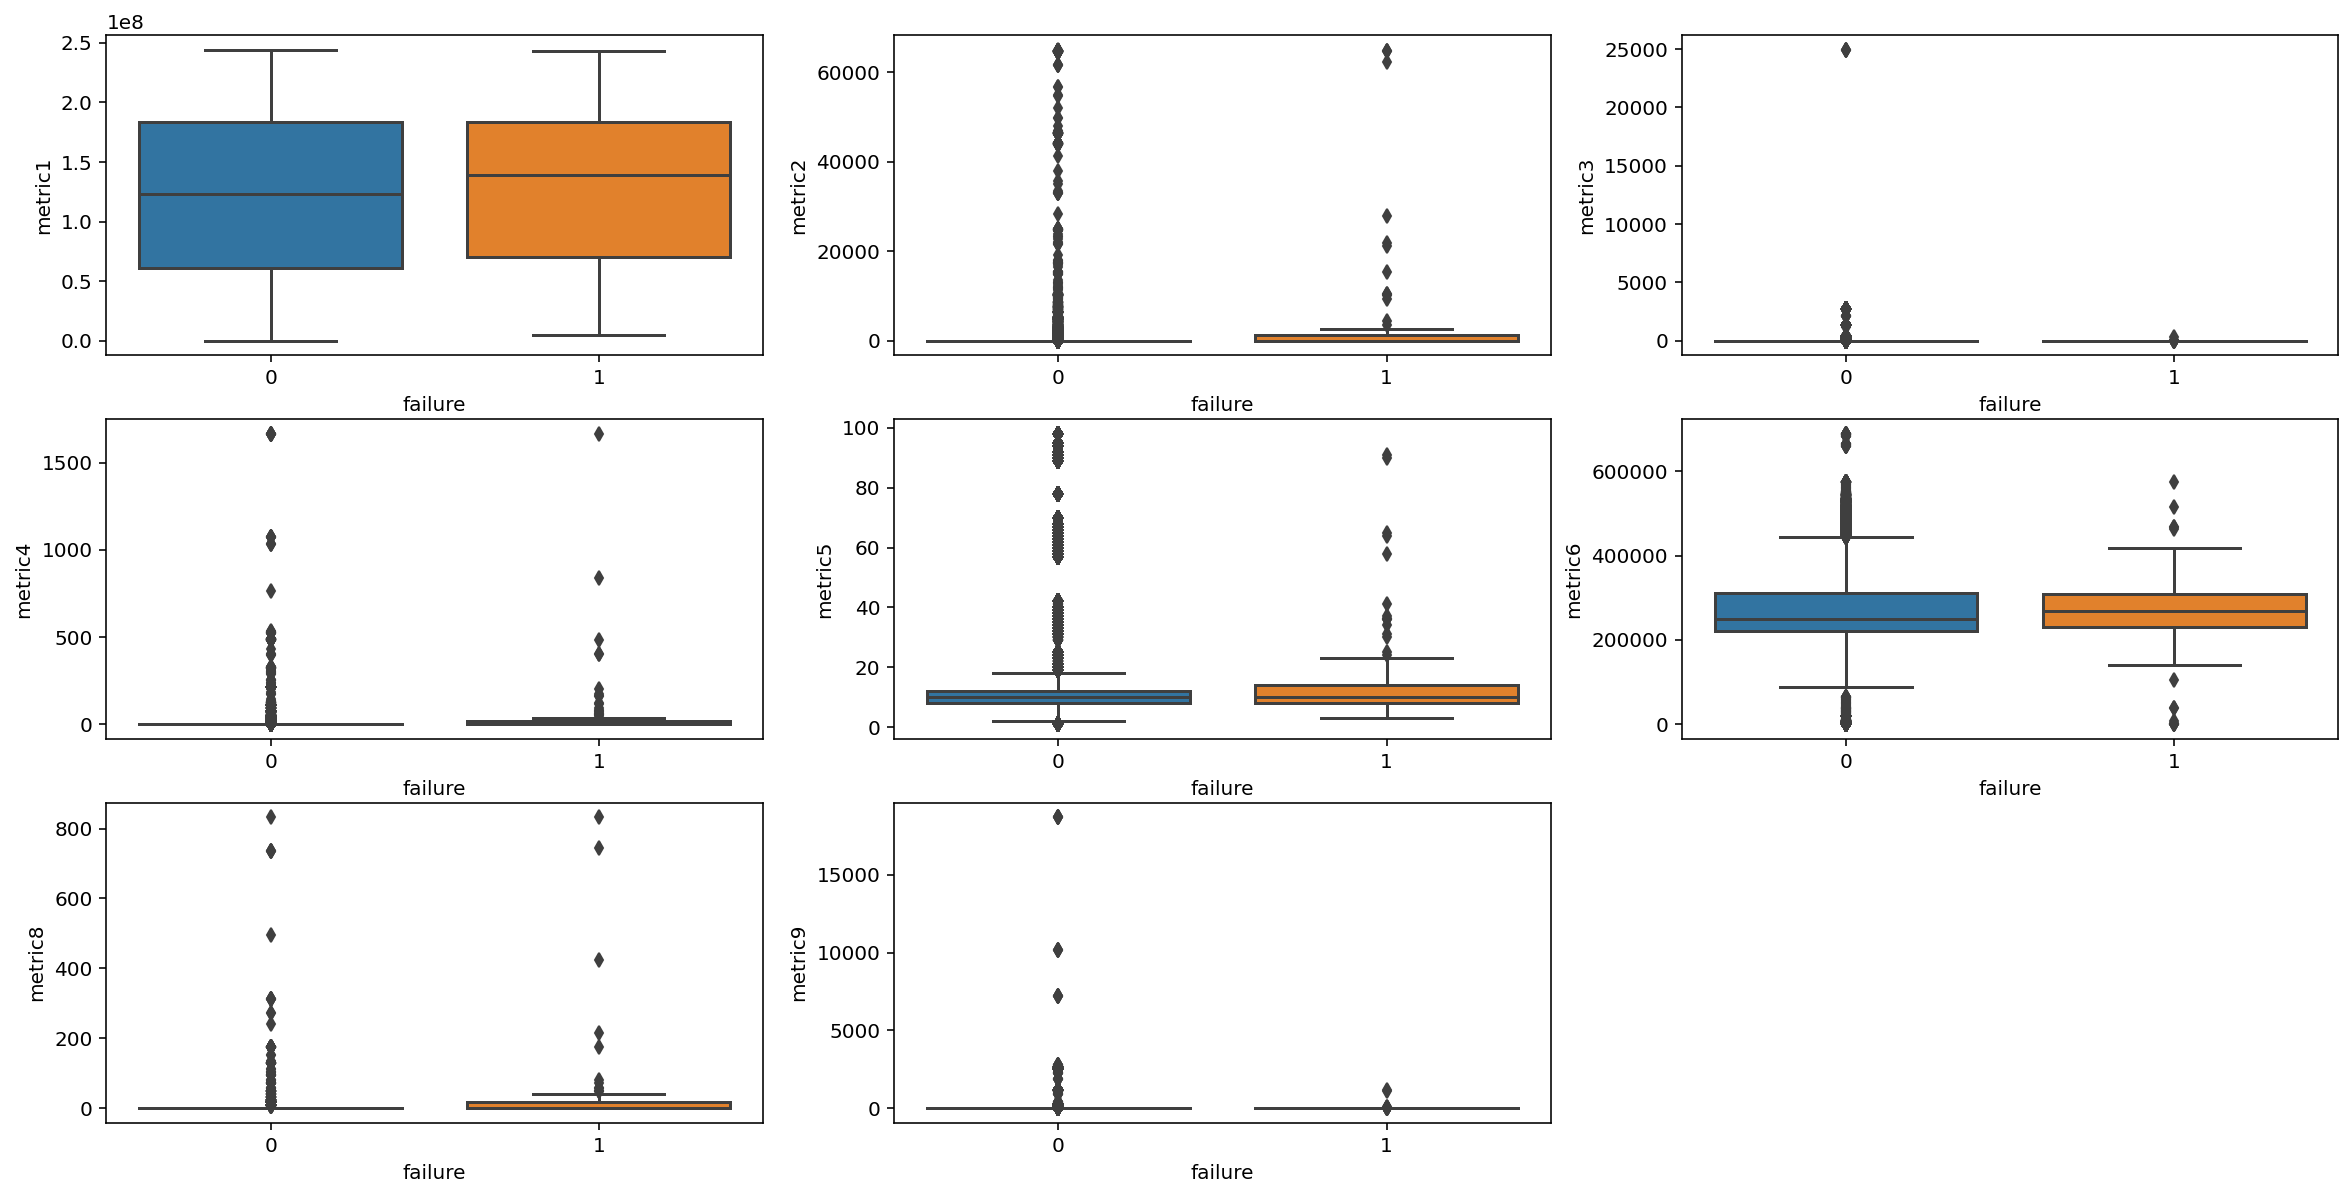

In [9]:
plt.figure(figsize=(20,10))
for i, c in enumerate(metrics_num):
    plt.subplot(3,3, i+1)
    sns.boxplot(x='failure', y=c, data=data_df)
plt.show()

### Date-Time relationship


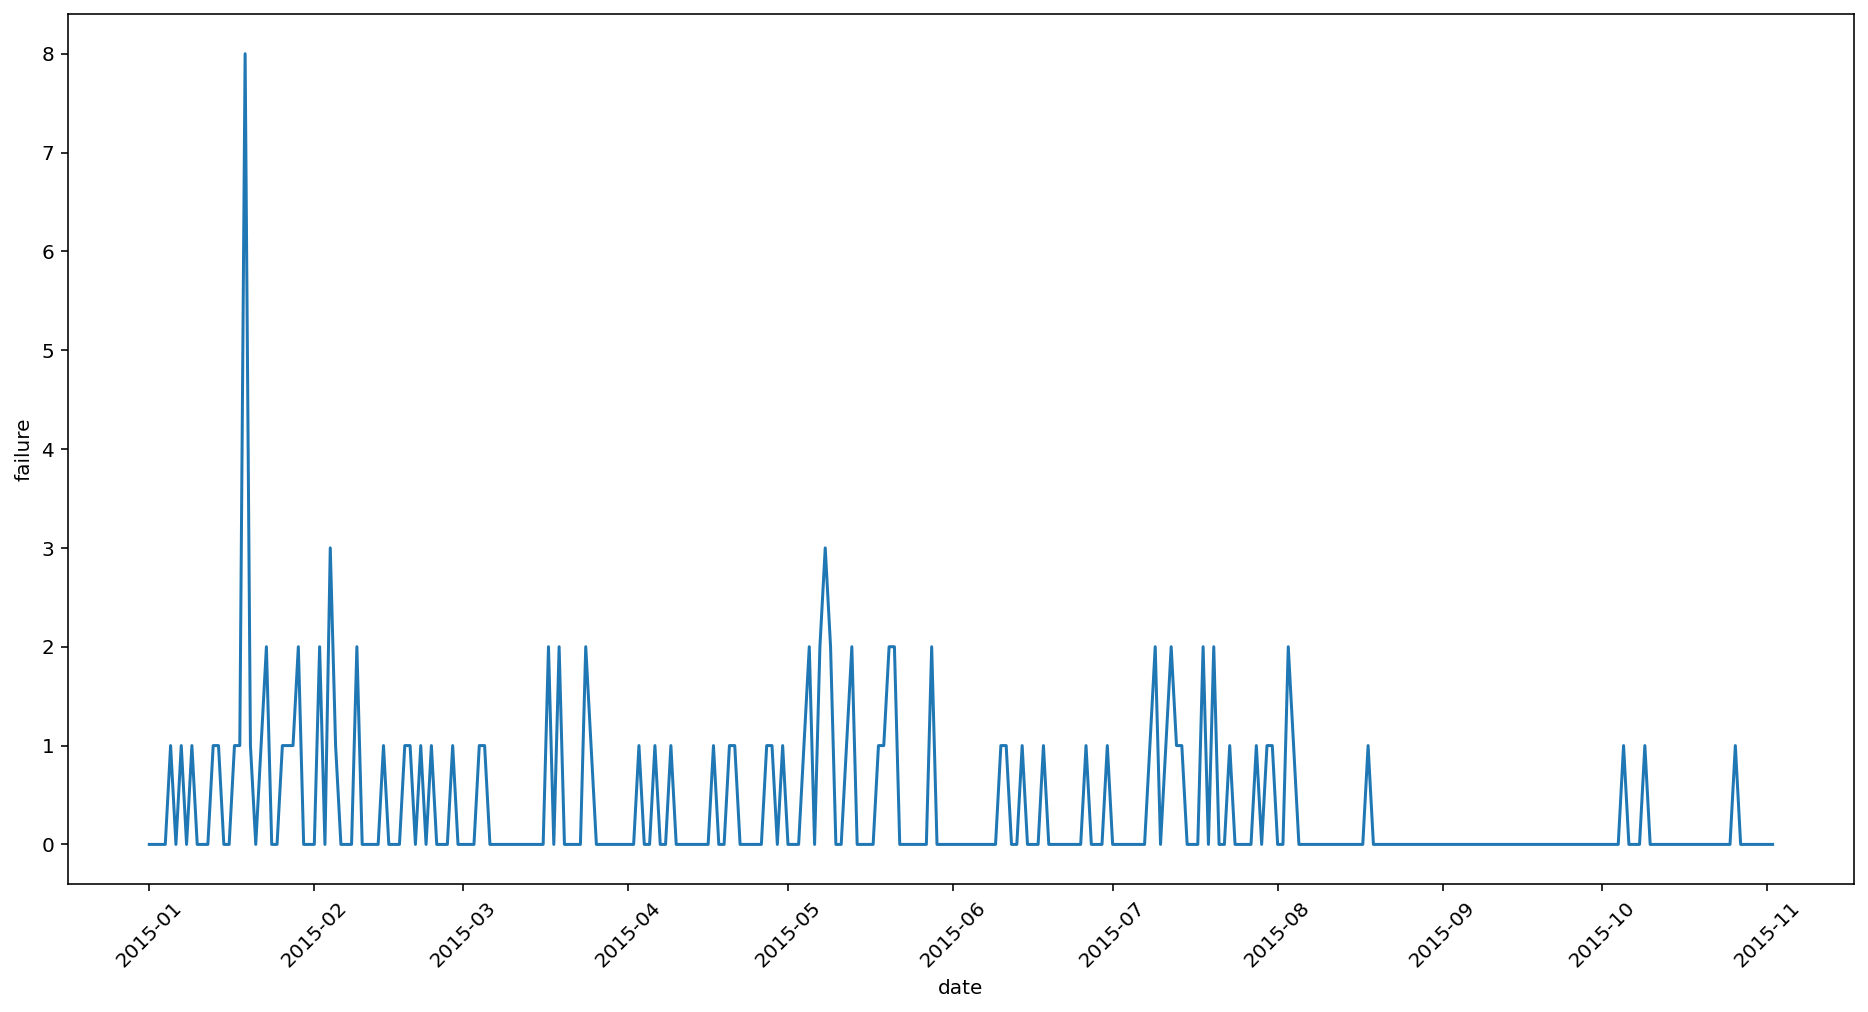

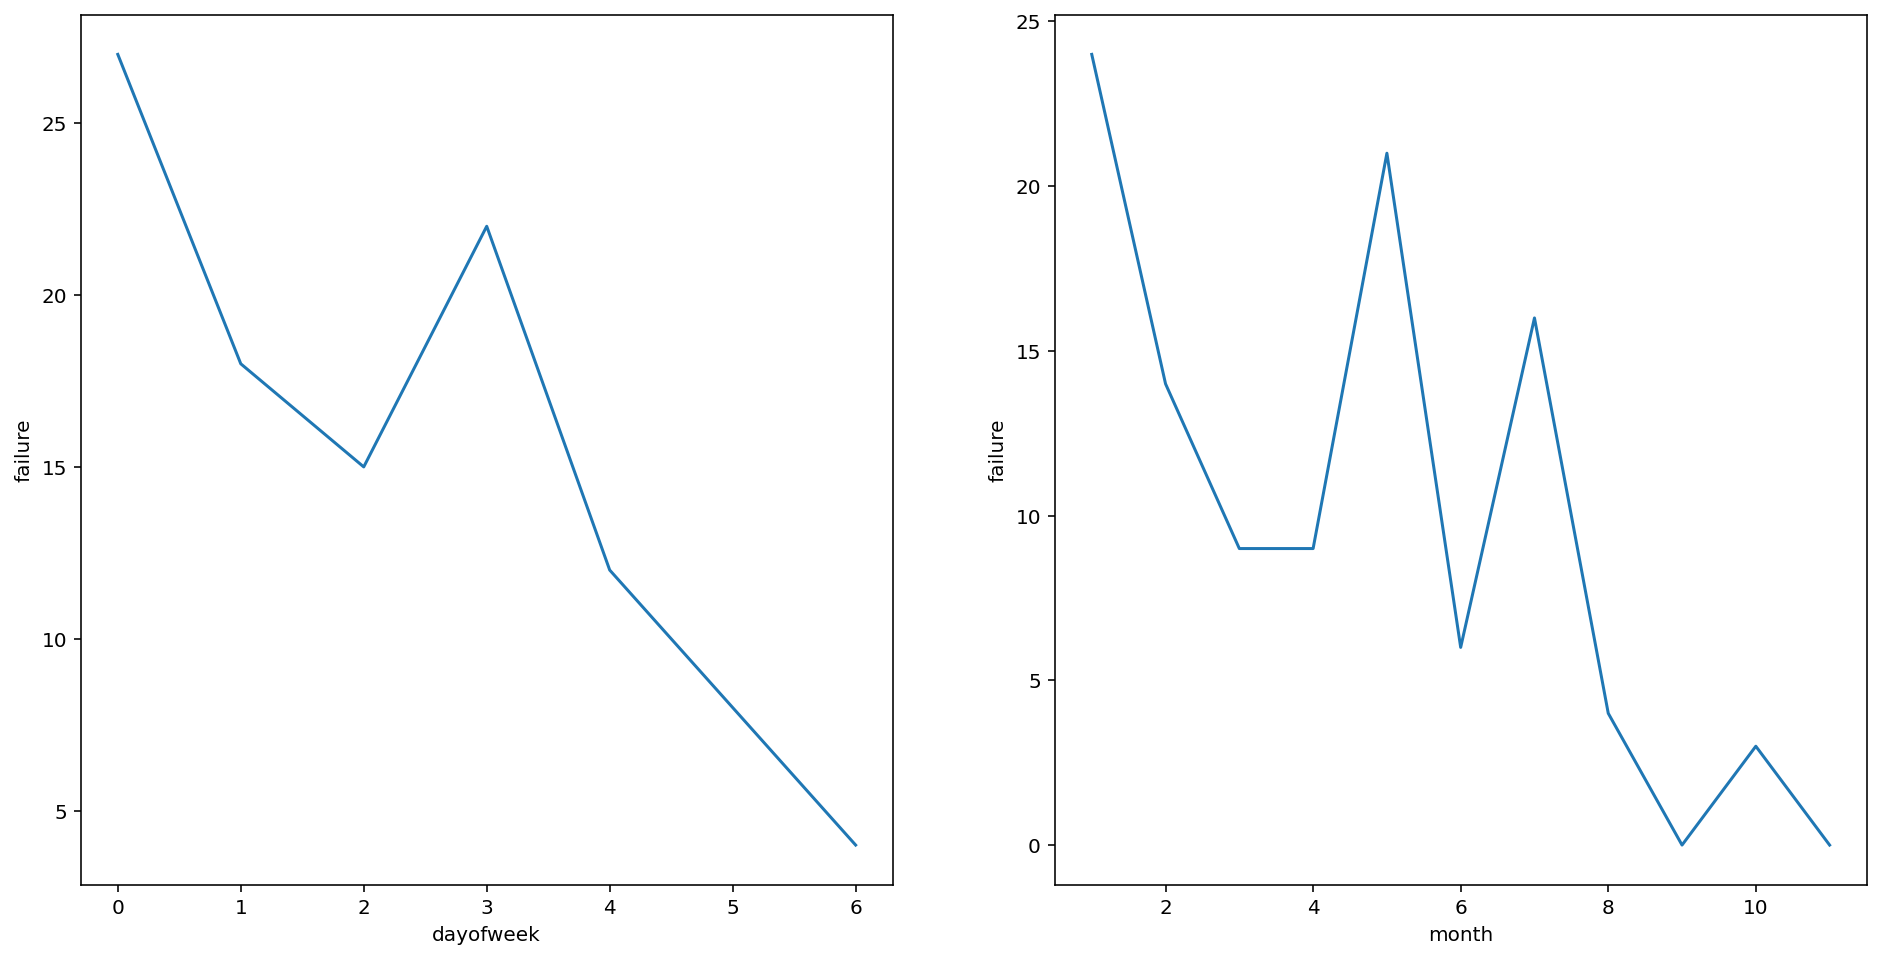

In [10]:
plt.figure(figsize=(16,8))
_ = data_df.groupby('date')['failure'].sum().reset_index()
ax = sns.lineplot(x='date', y='failure', data=_)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
_ = data_df.groupby('dayofweek')['failure'].sum().reset_index()
sns.lineplot(x='dayofweek', y='failure', data=_)

plt.subplot(1, 2, 2)
_ = data_df.groupby('month')['failure'].sum().reset_index()
_ = _.sort_values(by=['month'])
sns.lineplot(x='month', y='failure', data=_)
plt.show()

We can see most of the faults are in the begining of the period and at the begining of the week, then the number start to decline towards the end.  

In [11]:
_1 = data_df[data_df.failure == 1]
_0 = data_df[data_df.failure == 0]
print('No of unique devices: {}'.format(len(data_df.id.unique())))
print('No of devices reported faults: {}'.format(len(_1.id.unique())))

No of unique devices: 1169
No of devices reported faults: 106


In [12]:
#Dropping date axis
data_df.drop('date', axis=1, inplace=True)

## Data preperation

### Data splitting

In [54]:
from sklearn.model_selection import train_test_split

X = data_df.drop('failure', axis = 1)
y = data_df['failure'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

print('No of 1s in training {}'.format(len(X_train[y_train==1])))
print('No of 1s in testing {}'.format(len(X_test[y_test==1])))

No of 1s in training 79
No of 1s in testing 27


In [55]:
X_train.head()

id    metric1  metric2  metric3  metric4  metric5  metric6  \
42991  W1F1BGAB    9337688        0        0        0        8       26   
52544  Z1F0MA1S  239419896        0        0        0        8   224443   
76556  W1F0JXDL  203301176       48        0        0        8   254618   
81080  S1F118JP  119413032        0        0        0        7   213751   
42268  W1F0Z4X2  111564000        0        0        0        8   316561   

       metric8  metric9  dayofweek  month  
42991        0        1          3      2  
52544        0        0          3      3  
76556        0        0          4      5  
81080        0        0          2      5  
42268        0      248          2      2

In [60]:
cat_features = ['id','dayofweek','month']
cat_features_index = [X_train.columns.tolist().index(x) for x in cat_features]

In [61]:
cat_features_index

[0, 9, 10]

In [49]:
data_df.shape

(124494, 12)

### Converting categorial features

To experiment the impact of id, day, month of the week, One-hot encoding is used for the day of the week, month, and target encoding for the ids. The ids could refer to the type of the device.

In [14]:
import category_encoders as ce

hot_encoder = ce.OneHotEncoder(cols=['dayofweek', 'month'])
target_encoder = ce.TargetEncoder(cols=['id'])

X_train = hot_encoder.fit_transform(X_train)
X_train = target_encoder.fit_transform(X=X_train, y=y_train)

X_test  = hot_encoder.transform(X_test)
X_test = target_encoder.transform(X=X_test)

In [85]:
##categorial only features
metrics_cat = X_train.columns.difference(metrics_num)

In [86]:
metrics_cat

Index(['dayofweek', 'id', 'month'], dtype='object')

In [73]:
X_train.head()

id    metric1  metric2  metric3  metric4  metric5  metric6  \
42991  W1F1BGAB    9337688        0        0        0        8       26   
52544  Z1F0MA1S  239419896        0        0        0        8   224443   
76556  W1F0JXDL  203301176       48        0        0        8   254618   
81080  S1F118JP  119413032        0        0        0        7   213751   
42268  W1F0Z4X2  111564000        0        0        0        8   316561   

       metric8  metric9  dayofweek  month  
42991        0        1          3      2  
52544        0        0          3      3  
76556        0        0          4      5  
81080        0        0          2      5  
42268        0      248          2      2

In [74]:
X_test.head()

id    metric1  metric2  metric3  metric4  metric5  metric6  \
9577    W1F0P6E1   58554272        0        0        0       37   258362   
92725   S1F11K34  105160120        0        0        0       16   352061   
110210  W1F0N84F    2301904        0        0        0        6   345947   
59968   Z1F0MBGF  127681904        0        0        0       57   238084   
31017   S1F13635  141142448        0        0        0       24   253356   

        metric8  metric9  dayofweek  month  
9577          0        0          5      1  
92725         0        0          0      6  
110210        0        1          2      8  
59968         0        0          0      3  
31017         0        0          0      2

### Data standarisation for LinearRegression

In [75]:
##Scalling data. StandarScaler will scale the values to be within 1 standard deviation, 
#it might change distribution. MinMaxScaler does not change the distributin.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[metrics_num] = scaler.fit_transform(X_train_scaled[metrics_num])
X_test_scaled[metrics_num] = scaler.transform(X_test_scaled[metrics_num])

### Oversampling minority class
Due to imbalanced classes, the minority class is oversampled using ADASYN/SMOTE techniques.

In [22]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [84]:
metrics_cat

Index(['dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'dayofweek_7', 'id', 'month_1',
       'month_10', 'month_11', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object')

In [88]:
%%time
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, SMOTENC

class Sampler(object):
    sampler = {'SMOTE':SMOTE(random_state=42), 
               'ADASYN':ADASYN(random_state=42),
               'SMOTENC':SMOTENC(random_state=42, 
                                 categorical_features=[X_train.columns.get_loc(c) for c in metrics_cat]),
               'RandomOverSampler':RandomOverSampler(random_state=42)}
    def __init__(self, name):
        self.smplr = self.sampler[name]
    
    def sampling(self, X_train, y_train):
        X_sampled, y_sampled = self.smplr.fit_resample(X_train, y_train)
        X_sampled = pd.DataFrame.from_records(X_sampled, columns=X_train.columns)
        y_sampled = pd.Series(y_sampled, name='failure')
        return X_sampled, y_sampled

#Sampling using different methods

#ADASYN uses a weighted distribution for different minority class examples according 
#to their level of difficulty in learning, where more synthetic data is generated
#for minority class examples that are harder to learn.
sampler = Sampler('ADASYN')
X_train_ADASYN, y_train_ADASYN = sampler.sampling(X_train[metrics_num], y_train)
#X_train_scaled_ADASYN, y_train_scaled_ADASYN = sampler.sampling(X_train_scaled[metrics_num], y_train)
X_test_ADASYN, y_test_ADASYN = sampler.sampling(X_test[metrics_num], y_test)

#SMOTENC takes the categorial data into consideration when oversampling
sampler = Sampler('SMOTENC')
X_train_sampled_SMOTENC, y_train_sampled_SMOTENC = sampler.sampling(X_train, y_train)
X_test_sampled_SMOTENC, y_test_sampled_SMOTENC = sampler.sampling(X_test, y_test)

#X_train_scaled_SMOTENC, y_train_scaled_SMOTENC = sampler.sampling(X_train_scaled, y_train)
#X_test_scaled_SMOTENC, y_test_scaled_SMOTENC = sampler.sampling(X_test_scaled, y_test)


MemoryError: Unable to allocate 4.15 GiB for an array with shape (93212, 5, 1195) and data type float64

In [29]:
print(X_train.shape)
print('No of 1s in training {}'.format(len(X_train[y_train==1])))


(93370, 27)
No of 1s in training 79


In [28]:
print(X_train_scaled_ADASYN.shape)
print('No of 1s in training {}'.format(len(X_train_scaled_ADASYN[y_train_scaled_ADASYN==1])))


(186603, 8)
No of 1s in training 93312


In [30]:
print(X_train_scaled_SMOTENC.shape)
print('No of 1s in training {}'.format(len(X_train_scaled_SMOTENC[y_train_scaled_SMOTENC==1])))


(186582, 27)
No of 1s in training 93291


## Class Definitions

### Classifier class definition

The class works as a wraper for different algorithms

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install catboost

In [33]:
#### Classifiers class
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


class Classifier(object):
    
    
    classifier = {'LogisticRegression':LogisticRegression(),
                  'XGBoost':xgb.XGBClassifier(),
                  'SVM': svm.SVC(),
                  'RandomForestClassifier': RandomForestClassifier()}
    
    
    #Classifier initial parameters
    clfr_init_param = {'LogisticRegression':{'random_state':42, 
                                             
                                             'max_iter':5
                                             }, 
                       'XGBoost': {'objective':'binary:logistic', 
                                   'max_delta_step': 1, 
                                   'random_state':42, 
                                   'min_child_weight':1},
                       'SVM': {'kernel': 'rbf', 
                               'class_weight':'balanced', 
                               'random_state':42},
                       'RandomForestClassifier': {'random_state':42}
                      }
    
    #Classifier tunning parameters
    clfr_tune_param = {'LogisticRegression':{'C':[0.005, 0.01, 0.1, 1.], 
                                             'penalty':['l1', 'l2'],
                                             'class_weight':[{1:10,0:1},{1:1,0:1}, 'balanced']
                                            },

                       'SVM': {'C':[0.005, 0.01, 0.1], 
                               'gamma':[0.001, 0.01, 0.1, 1]},
                       
                       'RandomForestClassifier': {'bootstrap': [True, False],
                                                  'max_depth': [10, 20, 30],
                                                  'max_features': ['auto', 'sqrt'],
                                                  'min_samples_leaf': [1, 2, 4],
                                                  'min_samples_split': [2, 5, 10],
                                                  'n_estimators': [200, 600, 800, 1000, 1200]},
                        'XGBoost':{
                                    'learning_rate': (0.001, 0.01, 'log-uniform'),
                                    'max_depth': (2, 6),
                                    'subsample': (0.1, 1.0, 'uniform'),
                                    'colsample_bytree': (0.1, 1.0, 'uniform'),
                                    'n_estimators': (400, 2000),
                                    'gamma': (0, 10., 'uniform')
                                    }
                      }
                           
    def __init__(self, name):
        self.name = name
        self.tune_param = {'clsfr__'+k: v for k,v in self.clfr_tune_param[name].items()}
        self.model = self.classifier[name].set_params(**self.clfr_init_param[name])   

### Plot class definition

In [34]:
#Plot class
class Plot:
    
    def __init__(self):
        pass
    
    @staticmethod  
    def plot_auc(y_test, y_pred_prob):
       
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(fpr, tpr, marker='.')
        plt.show()
        auc_score = roc_auc_score(y_test, y_pred_prob)
        print('AUC: %.3f' % auc_score)
    
    @staticmethod
    def plot_precision_recall(y_test, y_pred_prob):
        
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) 
        plt.title("Precision-Recall vs Threshold Chart")
        plt.plot(thresholds, precision[:-1], "b--", label="Precision")
        plt.plot(thresholds, recall[:-1], "r--", label="Recall")
        plt.ylabel("Precision, Recall")
        plt.xlabel("Threshold")
        plt.legend(loc="lower left")
        plt.ylim([0,1])
        plt.show()

        plt.step(recall, precision, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall, precision, alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve')
        plt.show()
    
    @staticmethod
    def confusion_matrix(y_true, y_pred):
        
        print("Classification Report: \n", classification_report(y_true=y_true, y_pred=y_pred))
        accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
        print("\nAccuracy",accuracy)
        
        conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
        print('Confusion matrix:\n', conf_mat)

        labels = ['Class 0', 'Class 1']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.show()

### Hyberparameter class definition (Grid+Baysian search)

In [37]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [40]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


from sklearn.metrics import recall_score, make_scorer

recall_scorer = make_scorer(recall_score, average='weighted')

#Cross validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    )



class HyperTuning(object):
    
    def __init__(self):
        pass
    
    @staticmethod
    def grid_search(name, X_train, y_train):
        clfr = Classifier(name)
        pipe = Pipeline([('clsfr', clfr.model)])

        grid = GridSearchCV(pipe, cv=cv, 
                            param_grid=clfr.tune_param, 
                            #iid=True, 
                            iid=False, 
                            #scoring='f1_weighted', 
                            scoring=recall_scorer,
                            verbose=3, 
                            n_jobs=-1,
                            refit=True
                           )

        grid.fit(X_train, y_train)
        
        print('Finished GridSearch')
        
        return grid 
    
    @staticmethod
    def baysian_search(name, X_train, y_train):
        clfr = Classifier(name)
        pipe = Pipeline([('clsfr', clfr.model)])

        opt = BayesSearchCV(
              estimator=pipe,
              scoring='f1_weighted',
              search_spaces = [(clfr.tune_param, 5)], # (parameter space, # of evaluations)
              cv=cv,
              verbose = True,
              n_jobs = -1,
              refit = True,
              random_state = 42
            )
        opt.fit(X_train, y_train)
        print('Finished Training')
        
        return opt
        
    
    @staticmethod
    def evaluate_opt(opt, X, y):
        print('Best model\n')
        print(opt.best_estimator_)
        print('\n')
        print('Best score on the validation: {}'.format(opt.best_score_))
        result_df = pd.DataFrame(opt.cv_results_)\
          .loc[:,['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score')
        print(result_df.head(5))
        print("*******************Training************************")
        print("Best. score: %s" % opt.best_score_)

        y_pred_prob = opt.predict_proba(X['train'])[:,1]
        y_pred = opt.predict(X['train'])
        Plot.confusion_matrix(y['train'], y_pred)

        ##################################
        print("*****************Testing***************************")

        y_pred_prob = opt.predict_proba(X['test'])[:,1]
        y_pred = opt.predict(X['test'])
        Plot.plot_auc(y_test, y_pred_prob)
        Plot.confusion_matrix(y['test'], y_pred)
        Plot.plot_precision_recall(y['test'], y_pred_prob)

## Modelling

### LinearRegression with SMOTENC Oversampling (All features)

It is clear that the model is overfitted on the training data. That is could be due to the 'id', day and month feature

Wall time: 0 ns
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.5s finished


Finished GridSearch
Best model

Pipeline(steps=[('clsfr',
                 LogisticRegression(class_weight={0: 1, 1: 1}, max_iter=5,
                                    random_state=42))])


Best score on the validation: 0.9341576357848024
    mean_test_score  rank_test_score  \
23         0.934158                1   
21         0.934158                1   
15         0.934083                3   
17         0.934077                4   
9          0.933729                5   

                                               params  
23  {'clsfr__C': 1.0, 'clsfr__class_weight': 'bala...  
21  {'clsfr__C': 1.0, 'clsfr__class_weight': {1: 1...  
15  {'clsfr__C': 0.1, 'clsfr__class_weight': {1: 1...  
17  {'clsfr__C': 0.1, 'clsfr__class_weight': 'bala...  
9   {'clsfr__C': 0.01, 'clsfr__class_weight': {1: ...  
*******************Training************************
Best. score: 0.9341576357848024
Classification Report: 
               precision    recall  f1-score   support

           0       

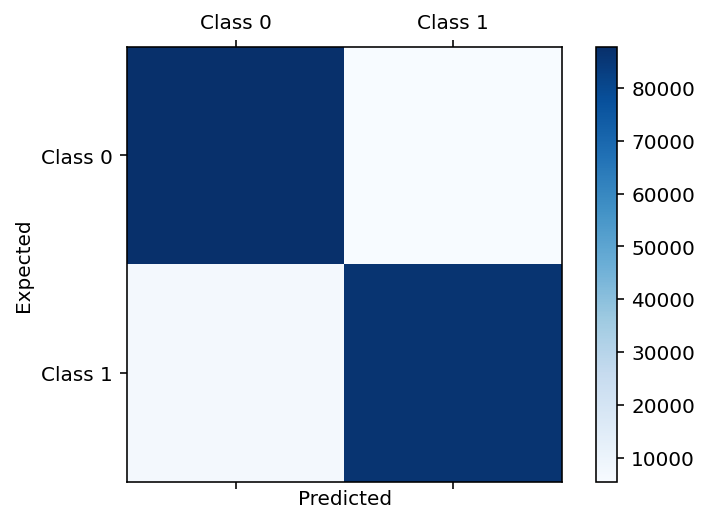

*****************Testing***************************


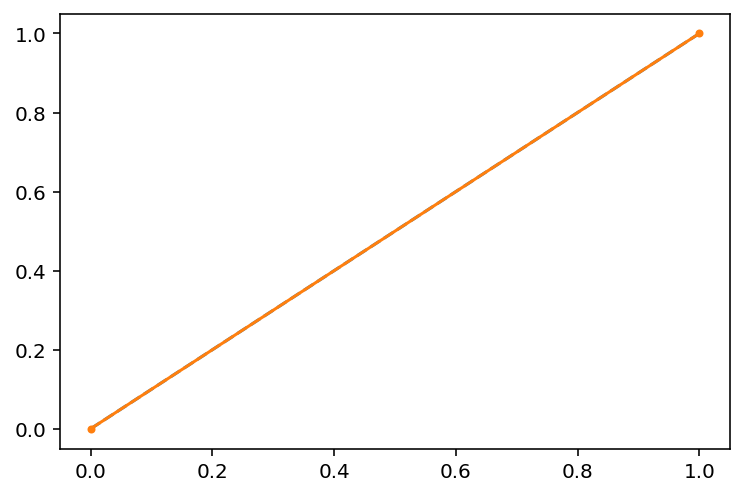

AUC: 0.500
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31097
           1       0.00      0.00      0.00        27

    accuracy                           1.00     31124
   macro avg       0.50      0.50      0.50     31124
weighted avg       1.00      1.00      1.00     31124


Accuracy 0.9991325022490682
Confusion matrix:
 [[31097     0]
 [   27     0]]


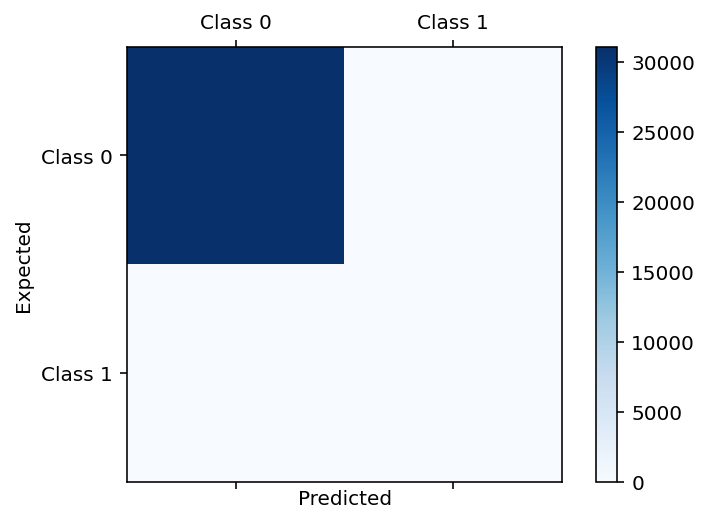

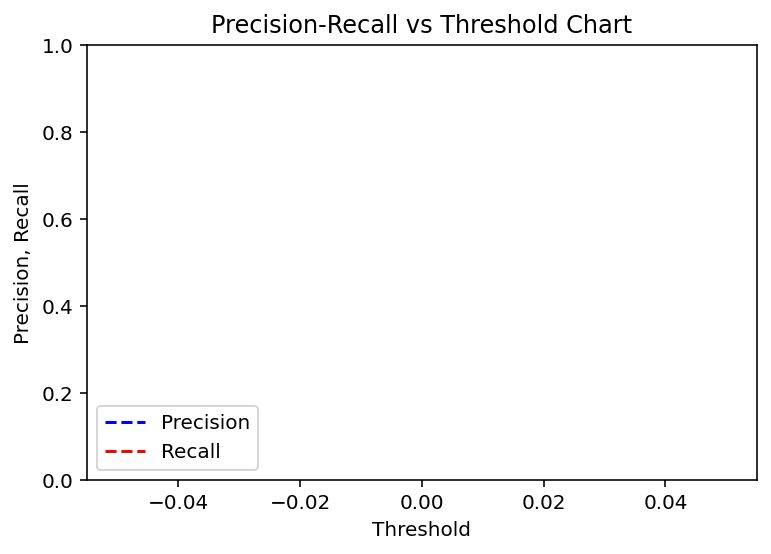

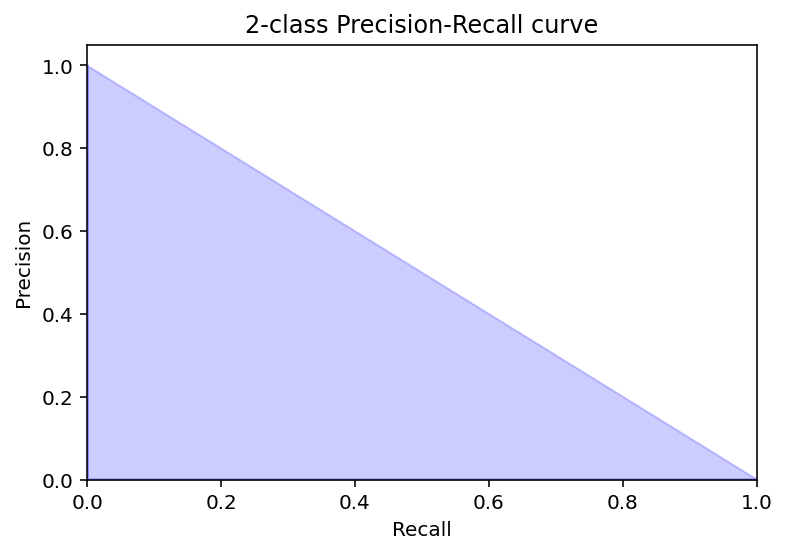

In [41]:
%time 
name = 'LogisticRegression'
X = {'train': X_train_scaled_SMOTENC, 'test':X_test}
y = {'train': y_train_scaled_SMOTENC, 'test':y_test}

grid = HyperTuning.grid_search(name, X_train_scaled_SMOTENC, 
                                     y_train_scaled_SMOTENC)
HyperTuning.evaluate_opt(grid, X, y)

### LinearRegression with ADASYN Oversampling (Numeric features)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.6s finished


Finished GridSearch
Best model

Pipeline(memory=None,
     steps=[('clsfr', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=5,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])


Best score on the validation: 0.7491248785182935
    mean_test_score  rank_test_score  \
22         0.749125                1   
20         0.749100                2   
16         0.748942                3   
14         0.748930                4   
10         0.746436                5   

                                               params  
22  {'clsfr__C': 1.0, 'clsfr__class_weight': 'bala...  
20  {'clsfr__C': 1.0, 'clsfr__class_weight': {1: 1...  
16  {'clsfr__C': 0.1, 'clsfr__class_weight': 'bala...  
14  {'clsfr__C': 0.1, 'clsfr__class_weight': {1: 1...  
10  {'clsfr__C': 0.01, 'clsfr__class_weight': 'bal...  
*******************Training

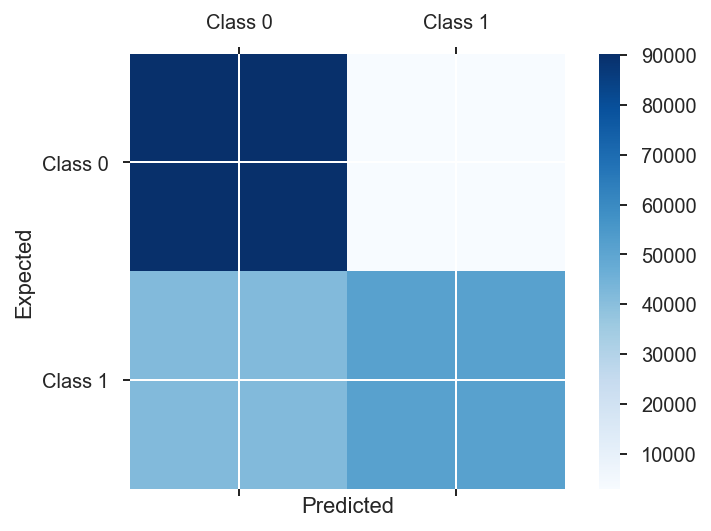

*****************Testing***************************


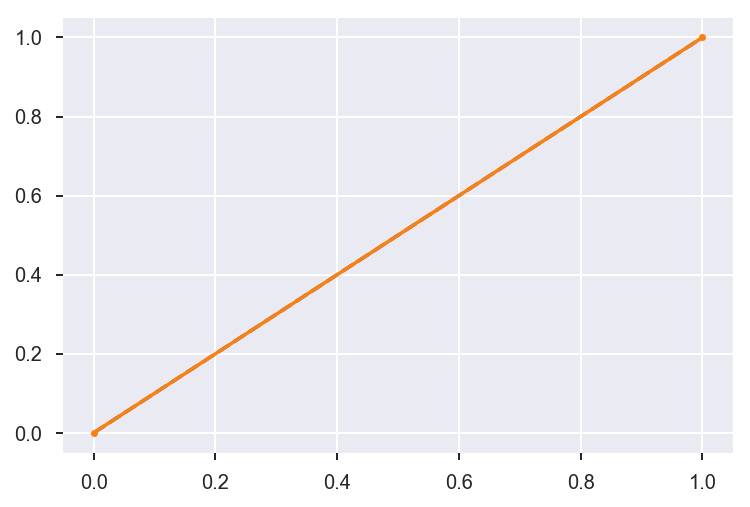

AUC: 0.500
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     31097
           1       0.00      1.00      0.00        27

   micro avg       0.00      0.00      0.00     31124
   macro avg       0.00      0.50      0.00     31124
weighted avg       0.00      0.00      0.00     31124


Accuracy 0.0008674977509317568
Confusion matrix:
 [[    0 31097]
 [    0    27]]


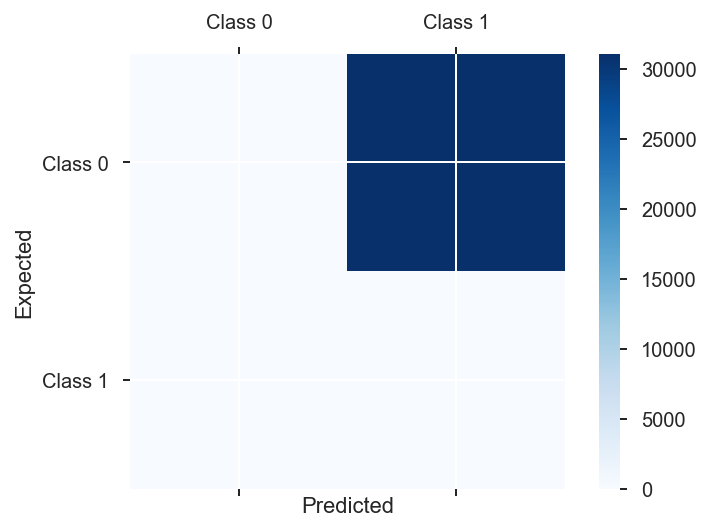

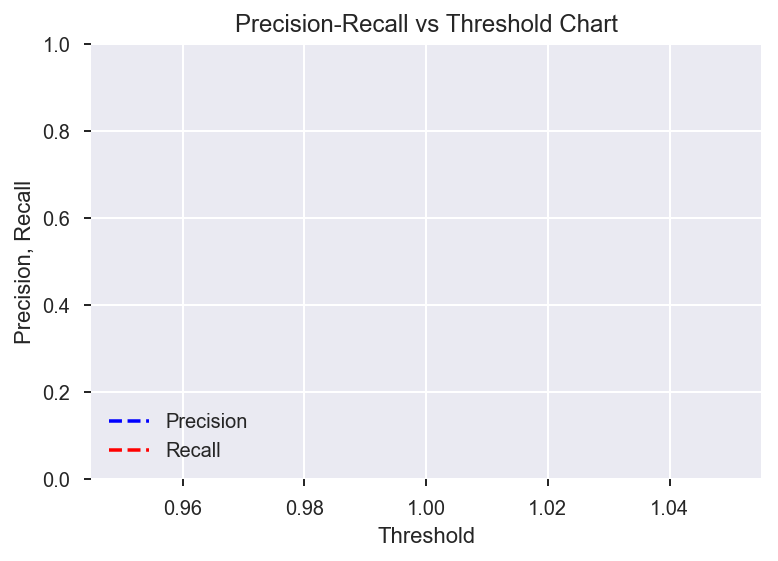

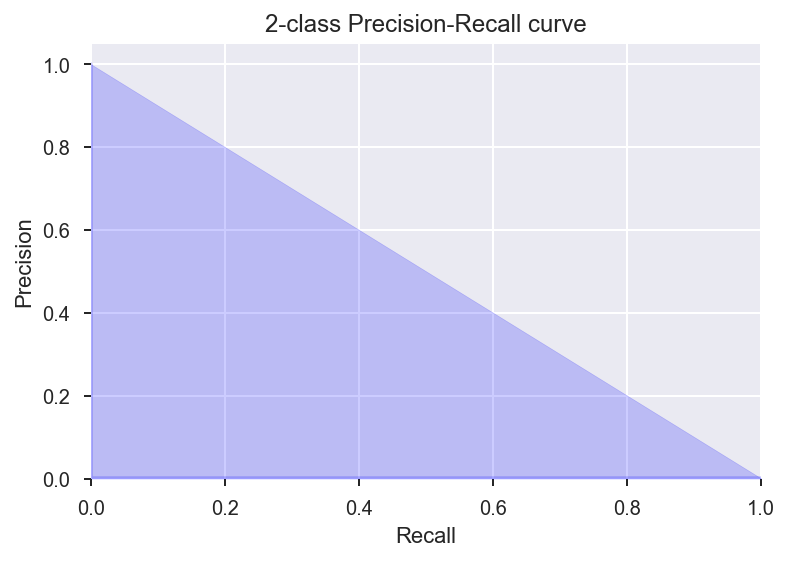

In [43]:
%time 
features = X_train_ADASYN.columns

name = 'LogisticRegression'
X = {'train': X_train_scaled_ADASYN, 'test':X_test[features]}
y = {'train': y_train_scaled_ADASYN, 'test':y_test}

grid = HyperTuning.grid_search(name, X['train'], 
                                     y['train'])
HyperTuning.evaluate_opt(grid, X, y)

In [ ]:
import numpy
import sklearn

class hhwjhh:
    
    hkhkmh :
        
        hehkh 
        

In [51]:
from catboost import CatBoostClassifier

In [69]:
from catboost import Pool

In [70]:
train_pool = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features_index
                 )

test_pool = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features_index)



In [71]:
model = CatBoostClassifier(iterations=200,
                              learning_rate=0.1)
model.fit(train_pool,eval_set=test_pool,verbose=10)

print('Model is fitted: {}'.format(model.is_fitted()))
print('Model params: \n{}'.format(model.get_params()))

0:	learn: 0.3949934	test: 0.3948494	best: 0.3948494 (0)	total: 333ms	remaining: 1m 6s
10:	learn: 0.0094558	test: 0.0099587	best: 0.0099587 (10)	total: 1.56s	remaining: 26.8s
20:	learn: 0.0052792	test: 0.0062937	best: 0.0062937 (20)	total: 3.23s	remaining: 27.5s
30:	learn: 0.0047417	test: 0.0059107	best: 0.0059107 (30)	total: 4.49s	remaining: 24.5s
40:	learn: 0.0044625	test: 0.0056815	best: 0.0056815 (40)	total: 5.56s	remaining: 21.6s
50:	learn: 0.0042362	test: 0.0055610	best: 0.0055503 (46)	total: 6.65s	remaining: 19.4s
60:	learn: 0.0038028	test: 0.0051828	best: 0.0051828 (60)	total: 8.18s	remaining: 18.6s
70:	learn: 0.0033973	test: 0.0048035	best: 0.0048035 (70)	total: 9.36s	remaining: 17s
80:	learn: 0.0032845	test: 0.0047253	best: 0.0047253 (80)	total: 10.7s	remaining: 15.7s
90:	learn: 0.0031259	test: 0.0046354	best: 0.0046312 (89)	total: 11.8s	remaining: 14.1s
100:	learn: 0.0029806	test: 0.0045654	best: 0.0045636 (99)	total: 13s	remaining: 12.8s
110:	learn: 0.0029204	test: 0.0045413

In [72]:
train_pool_ADASYN = Pool(data=X_train_ADASYN,
                  label=y_train_ADASYN,
                  cat_features=cat_features_index
                 )

test_pool_ADASYN = Pool(data=X_test_ADASYN,
                  label=y_test_ADASYN,
                  cat_features=cat_features_index)


CatBoostError: Invalid cat_features[1] = 9 value: index must be < 8.

In [ ]:
model_ADASYN = CatBoostClassifier(iterations=200,
                              learning_rate=0.1)
model_ADASYN.fit(train_pool,eval_set=test_pool,verbose=10)

print('Model is fitted: {}'.format(model_ADASYN.is_fitted()))
print('Model params: \n{}'.format(model_ADASYN.get_params()))

In [ ]:
train_pool_SMOTE = Pool(data=X_train_SMOTE,
                  label=y_train_SMOTE,
                  cat_features=cat_features_index
                 )

test_pool_SMOTE = Pool(data=X_test_SMOTE,
                  label=y_test_SMOTE,
                  cat_features=cat_features_index)

In [65]:
model_SMOTE = CatBoostClassifier(iterations=200,
                              learning_rate=0.1)
model_SMOTE.fit(train_pool,eval_set=test_pool,verbose=10)

print('Model is fitted: {}'.format(model_SMOTE.is_fitted()))
print('Model params: \n{}'.format(model_SMOTE.get_params()))

Learning rate set to 0.312729
0:	learn: 0.1005094	total: 108ms	remaining: 21.4s
10:	learn: 0.0046930	total: 1.11s	remaining: 19s
20:	learn: 0.0034861	total: 2.06s	remaining: 17.6s
30:	learn: 0.0028972	total: 2.98s	remaining: 16.2s
40:	learn: 0.0027095	total: 3.91s	remaining: 15.2s
50:	learn: 0.0025719	total: 4.84s	remaining: 14.1s
60:	learn: 0.0024510	total: 5.72s	remaining: 13s
70:	learn: 0.0022755	total: 6.69s	remaining: 12.2s
80:	learn: 0.0021473	total: 7.63s	remaining: 11.2s
90:	learn: 0.0019925	total: 8.58s	remaining: 10.3s
100:	learn: 0.0019094	total: 9.56s	remaining: 9.37s
110:	learn: 0.0018188	total: 10.5s	remaining: 8.41s
120:	learn: 0.0016884	total: 11.3s	remaining: 7.39s
130:	learn: 0.0016018	total: 12.3s	remaining: 6.46s
140:	learn: 0.0015269	total: 13.2s	remaining: 5.53s
150:	learn: 0.0014317	total: 14.1s	remaining: 4.58s
160:	learn: 0.0013564	total: 15.1s	remaining: 3.66s
170:	learn: 0.0012826	total: 16s	remaining: 2.72s
180:	learn: 0.0011572	total: 17s	remaining: 1.78s
1

In [67]:
y_pred=model_cat.predict(X_train)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93291
           1       0.72      0.23      0.35        79

    accuracy                           1.00     93370
   macro avg       0.86      0.61      0.67     93370
weighted avg       1.00      1.00      1.00     93370


Accuracy 0.9992717146835172
Confusion matrix:
 [[93284     7]
 [   61    18]]


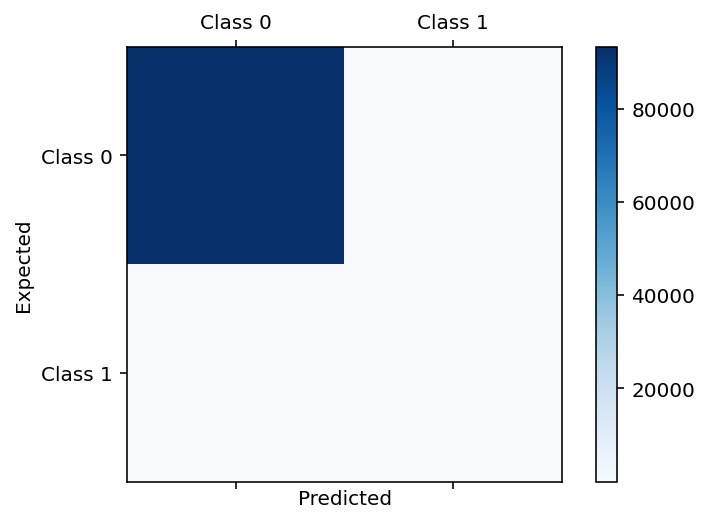

In [68]:
Plot.confusion_matrix(y_train, y_pred)

In [66]:
model_cat.predict_proba(X_train)

array([[9.99953643e-01, 4.63566337e-05],
       [9.99997404e-01, 2.59646280e-06],
       [9.99987029e-01, 1.29711669e-05],
       ...,
       [9.99816397e-01, 1.83603293e-04],
       [9.99940783e-01, 5.92174662e-05],
       [9.99997580e-01, 2.42033843e-06]])

### XGBoost with ADASYN Oversampling (Numerial features)

In [46]:
%time 
name = 'XGBoost'
features = X_train_ADASYN.columns
X = {'train': X_train_ADASYN.as_matrix(), 'test':X_test[features].as_matrix()}
y = {'train': y_train_ADASYN.as_matrix(), 'test':y_test.as_matrix()}

opt = HyperTuning.baysian_search(name, X['train'], y['train'])
HyperTuning.evaluate_opt(opt, X, y)

Wall time: 0 ns


AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [45]:
X_train_scaled_ADASYN.as_matrix()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

Wall time: 0 ns
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 136.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 164.3min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 165.0min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 170.5min finished


[00:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Finished GridSearch
Best model

Pipeline(steps=[('clsfr',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1.0, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=1, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=2000,
                               n_jobs=8, num_parallel_tree=1, random_state=42,
      

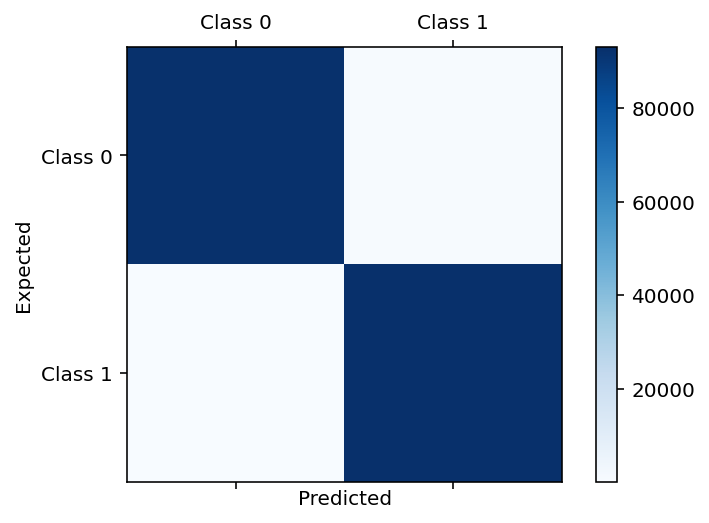

*****************Testing***************************


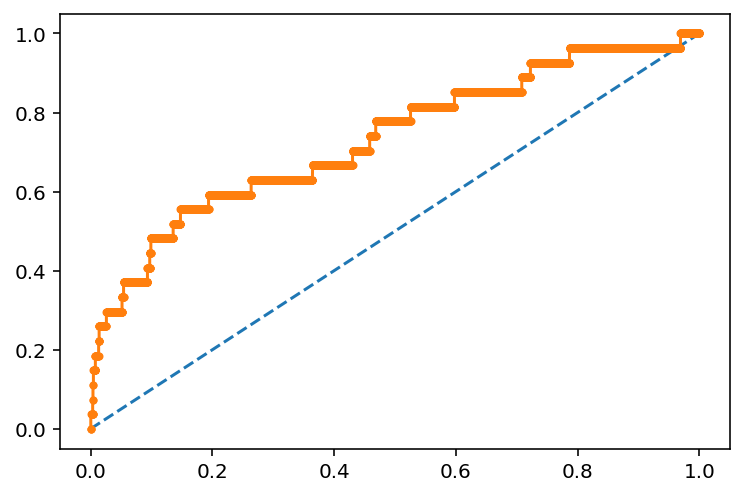

AUC: 0.732
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     31097
           1       0.02      0.19      0.03        27

    accuracy                           0.99     31124
   macro avg       0.51      0.59      0.51     31124
weighted avg       1.00      0.99      0.99     31124


Accuracy 0.9908752088420512
Confusion matrix:
 [[30835   262]
 [   22     5]]


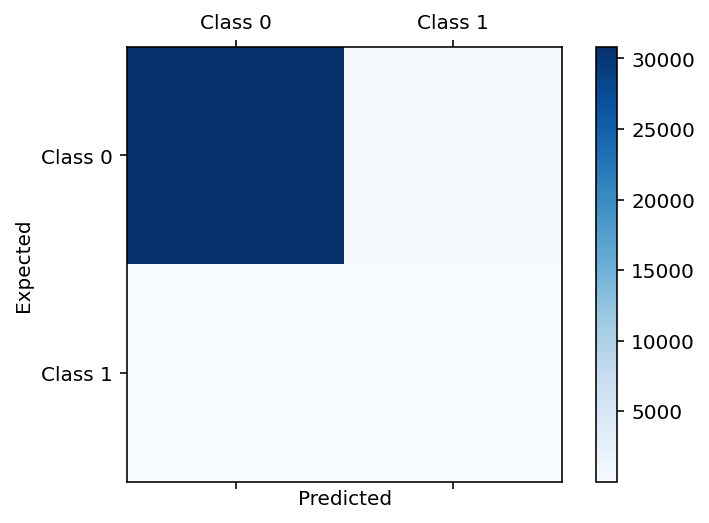

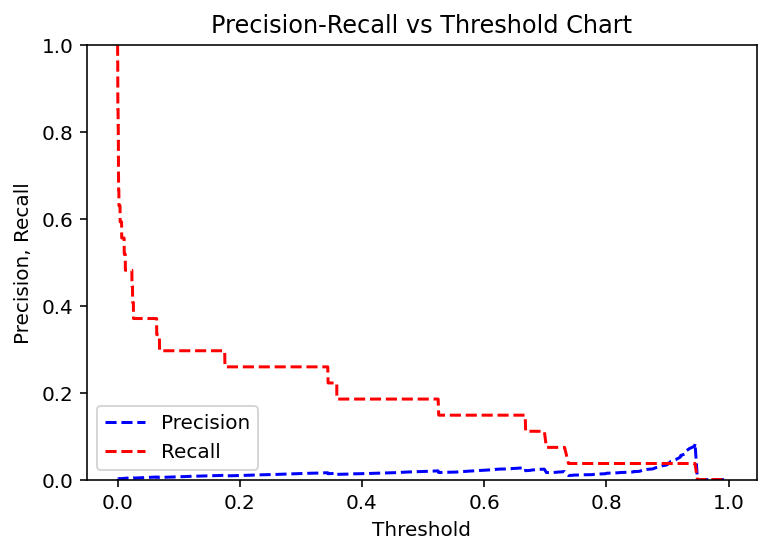

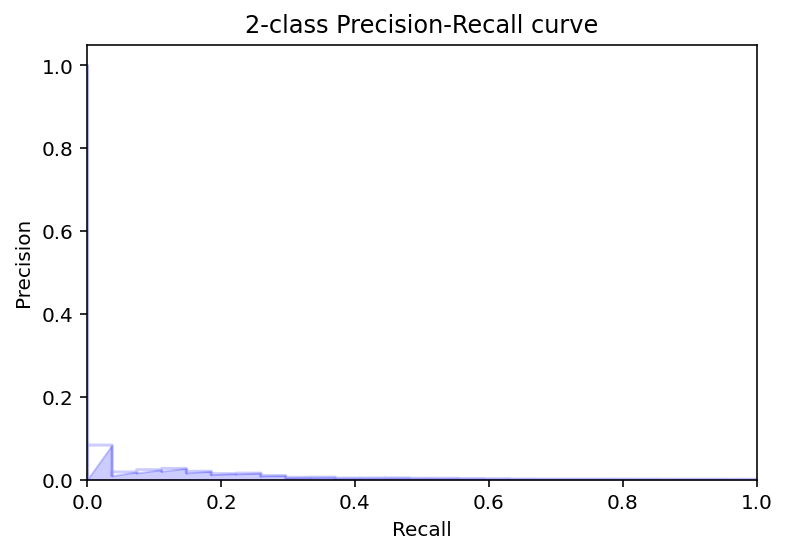

In [47]:
%time 
name = 'XGBoost'
features = X_train_ADASYN.columns
X = {'train': X_train_ADASYN, 'test':X_test[features]}
y = {'train': y_train_ADASYN, 'test':y_test}

#opt = HyperTuning.baysian_search(name, X['train'], y['train'])
opt = HyperTuning.grid_search(name, X['train'], y['train'])
HyperTuning.evaluate_opt(opt, X, y)

#### Calibiration of probabilities

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     31097
           1       0.01      0.78      0.02        27

   micro avg       0.94      0.94      0.94     31124
   macro avg       0.51      0.86      0.49     31124
weighted avg       1.00      0.94      0.97     31124


Accuracy 0.9354196118750803
Confusion matrix:
 [[29093  2004]
 [    6    21]]


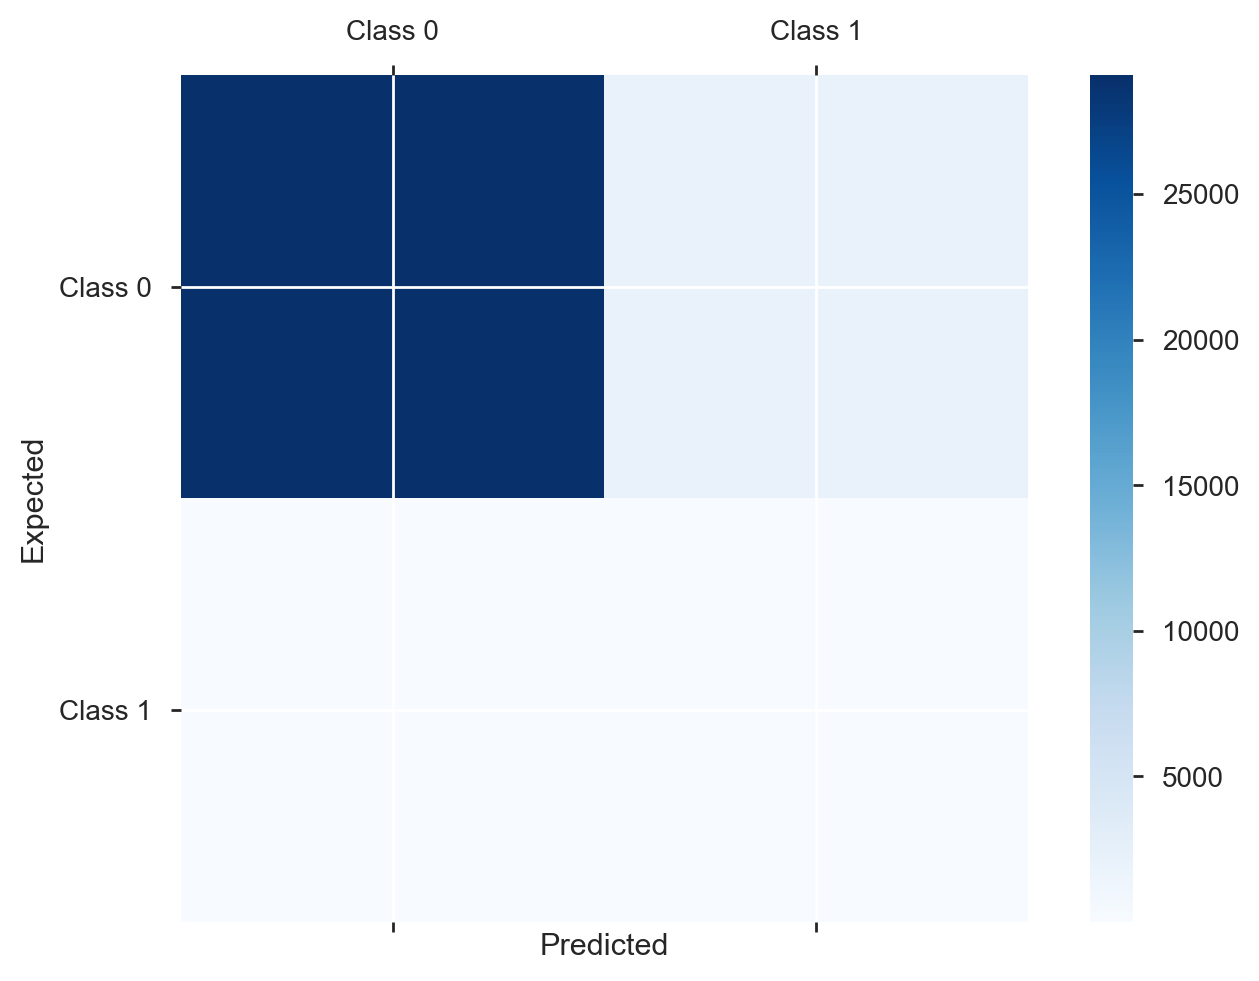

In [38]:
# calibrate model on validation data
from sklearn.calibration import CalibratedClassifierCV

calibrator = CalibratedClassifierCV(opt, method='isotonic', cv='prefit', )
calibrator.fit(X['train'], y['train'])
# evaluate the model
y_pred = calibrator.predict(X_test[features].as_matrix())
Plot.confusion_matrix(y['test'], y_pred)

#### Prediction on oversampled test data

******************Before calibiration************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     31097
           1       0.96      0.89      0.93     31104

   micro avg       0.93      0.93      0.93     62201
   macro avg       0.93      0.93      0.93     62201
weighted avg       0.93      0.93      0.93     62201


Accuracy 0.9284738187488947
Confusion matrix:
 [[30001  1096]
 [ 3353 27751]]


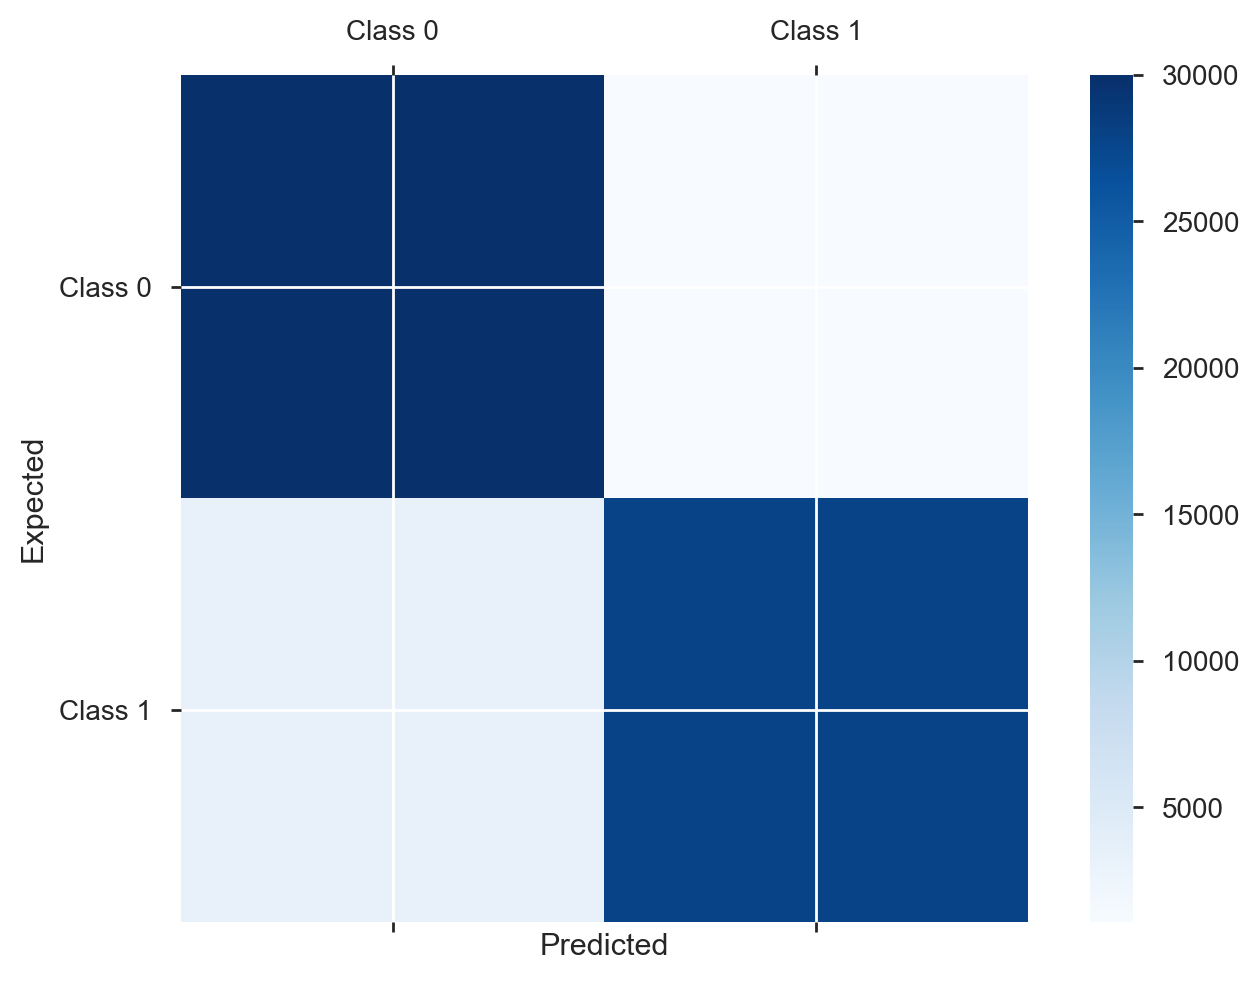

*******************Calbirated*********************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     31097
           1       0.94      0.97      0.95     31104

   micro avg       0.95      0.95      0.95     62201
   macro avg       0.95      0.95      0.95     62201
weighted avg       0.95      0.95      0.95     62201


Accuracy 0.950676034147361
Confusion matrix:
 [[29093  2004]
 [ 1064 30040]]


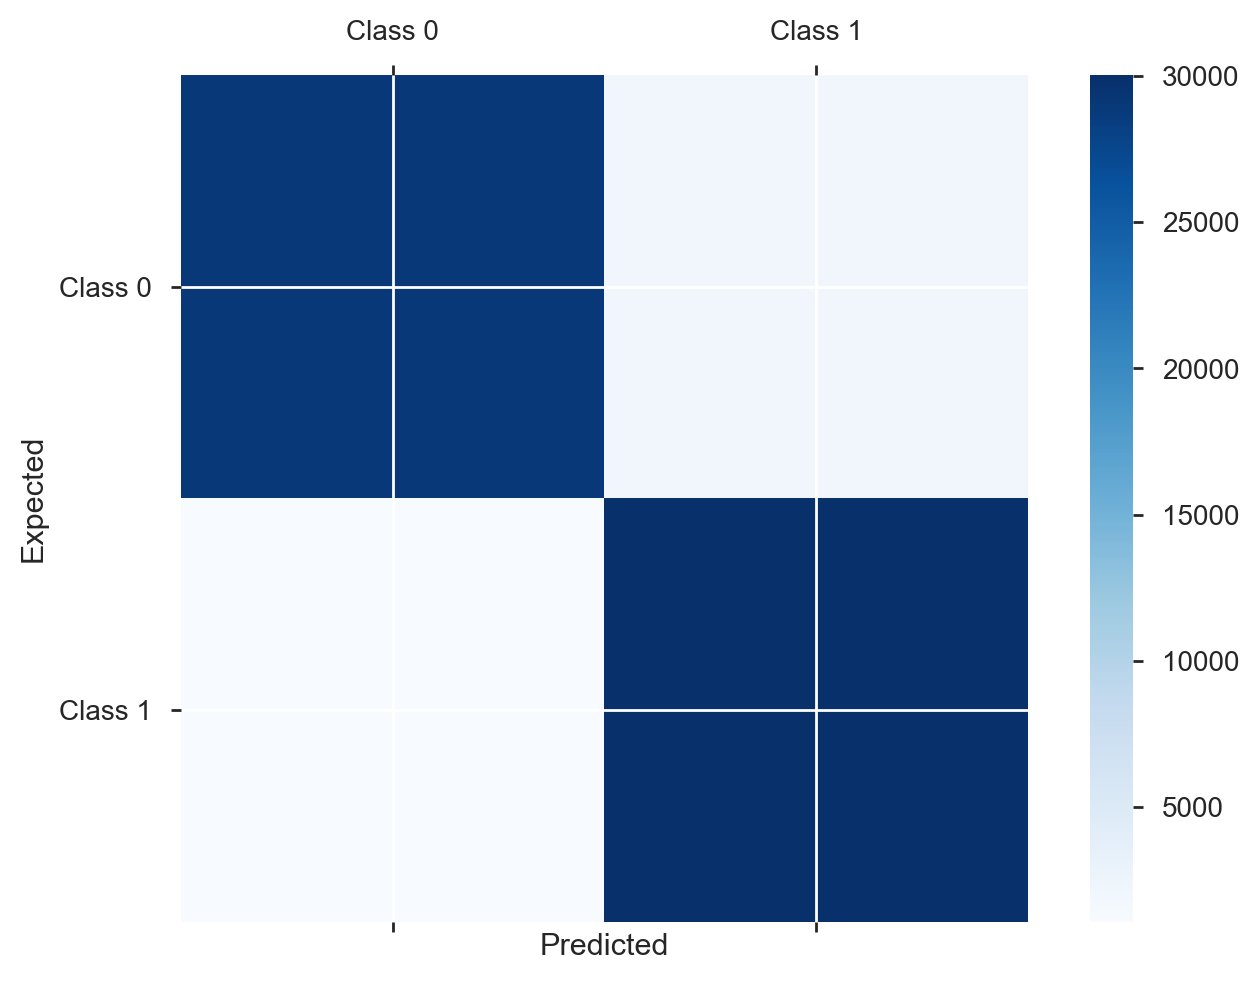

In [37]:
print('******************Before calibiration************************')
y_pred_test = opt.predict(X_test_ADASYN[features].as_matrix())
Plot.confusion_matrix(y_test_ADASYN, y_pred_test)

print('*******************Calbirated*********************************')
y_pred_test = calibrator.predict(X_test_ADASYN[features].as_matrix())
Plot.confusion_matrix(y_test_ADASYN, y_pred_test)

### XGBoost with SMOTENC Oversampling (All features)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.3 µs
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


Finished Training
Best model

Pipeline(memory=None,
     steps=[('clsfr', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.46909356296798244, gamma=7.277257431773251,
       learning_rate=0.008567773934012713, max_delta_step=1, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1472, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.4727067692369846))])


Best score on the validation: 0.9985421944029759
*******************Training************************
Best. score: 0.9985421944029759
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93291
           1       1.00      1.00      1.00     93291

   micro avg       1.00      1.00      1.00    186582
   macro avg       1.00      1.00      1.00    186582
weighted avg       1.00   

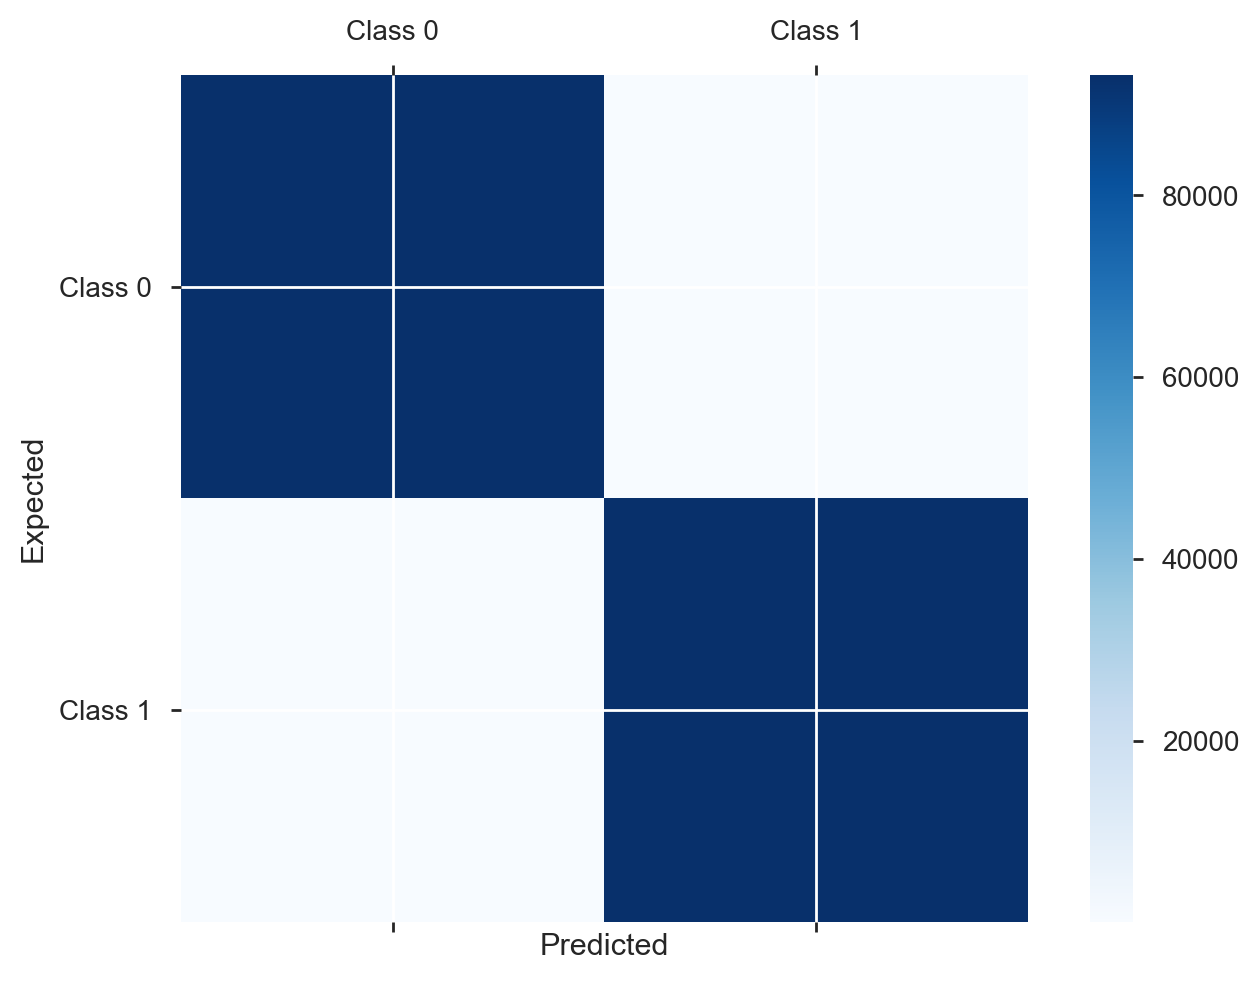

*****************Testing***************************


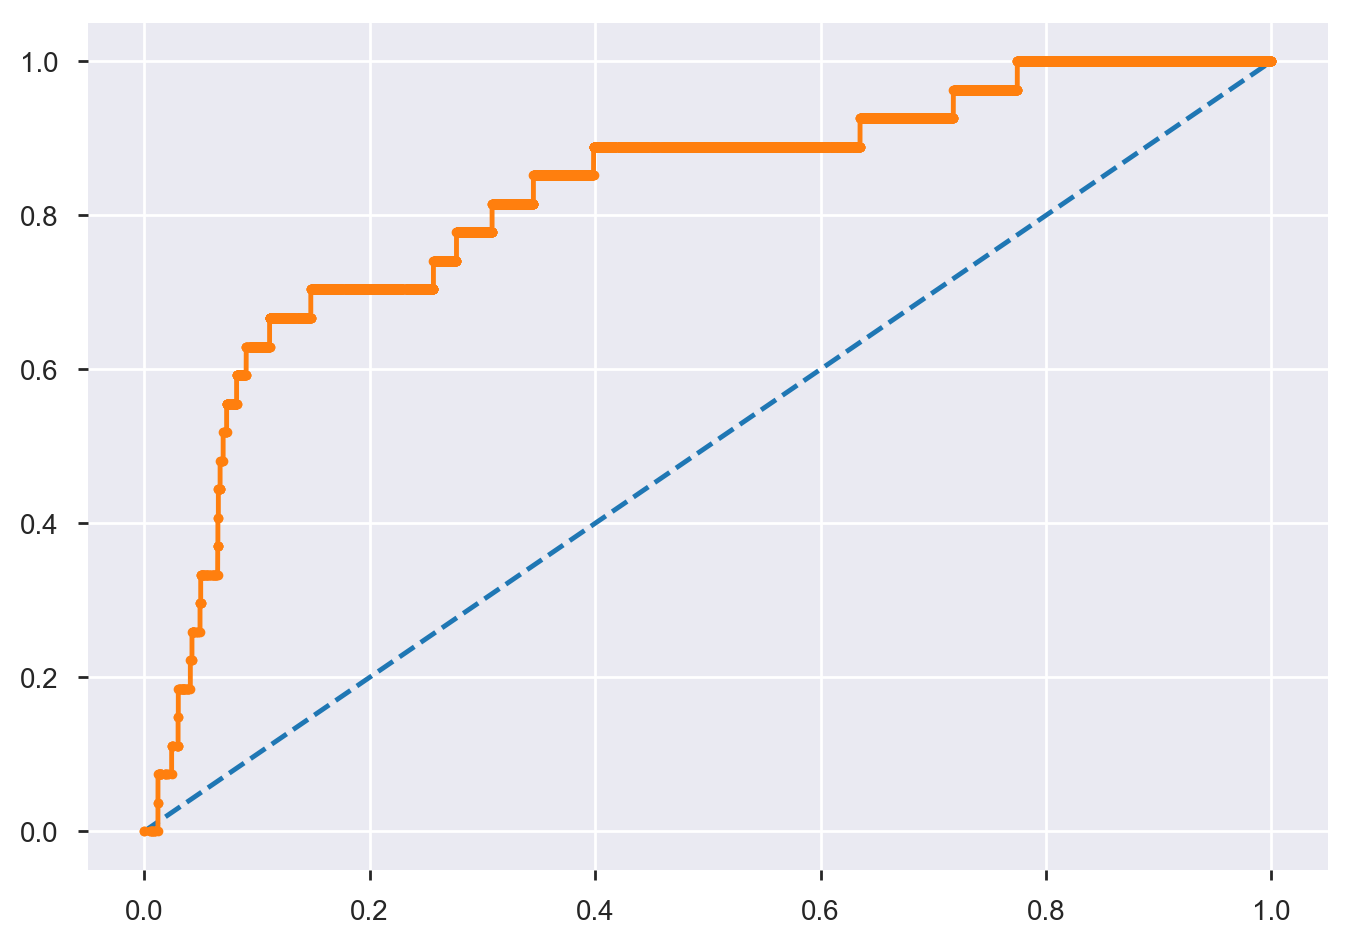

AUC: 0.821
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31097
           1       0.00      0.00      0.00        27

   micro avg       1.00      1.00      1.00     31124
   macro avg       0.50      0.50      0.50     31124
weighted avg       1.00      1.00      1.00     31124


Accuracy 0.9961123248939725
Confusion matrix:
 [[31003    94]
 [   27     0]]


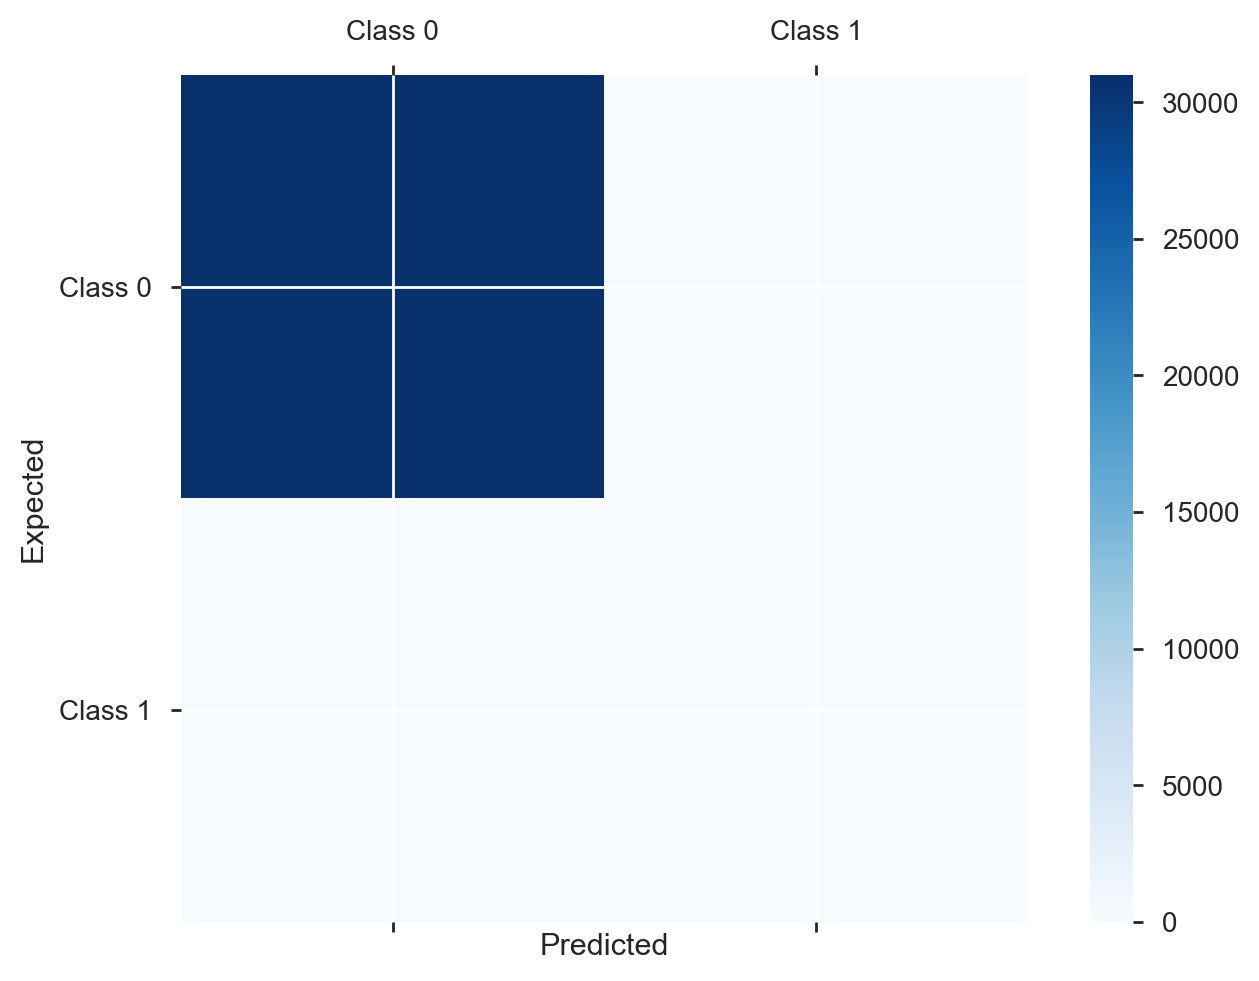

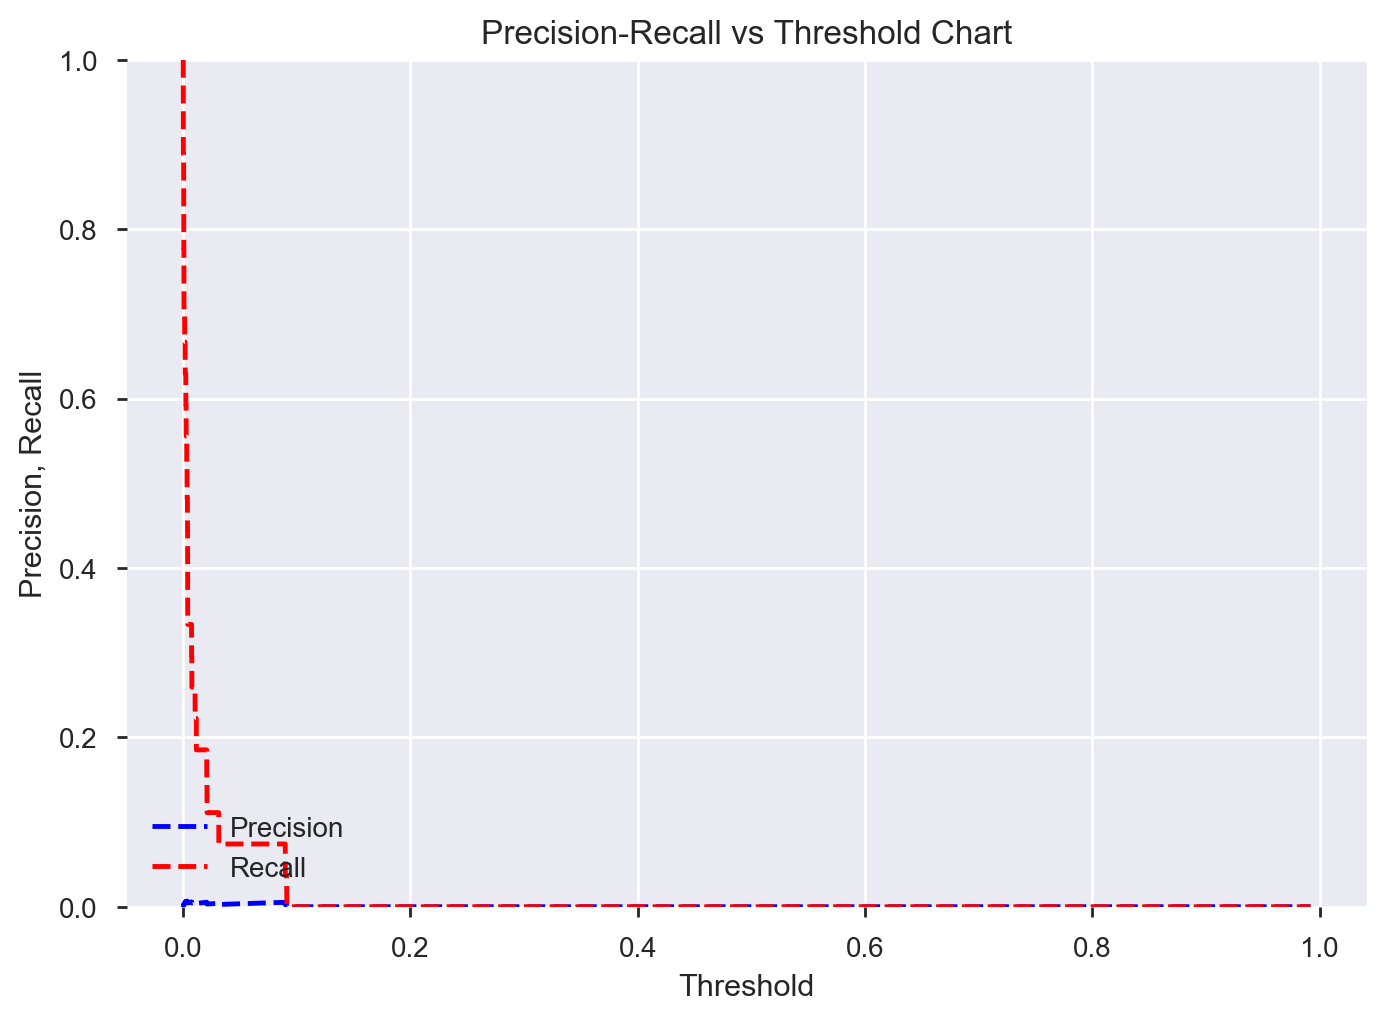

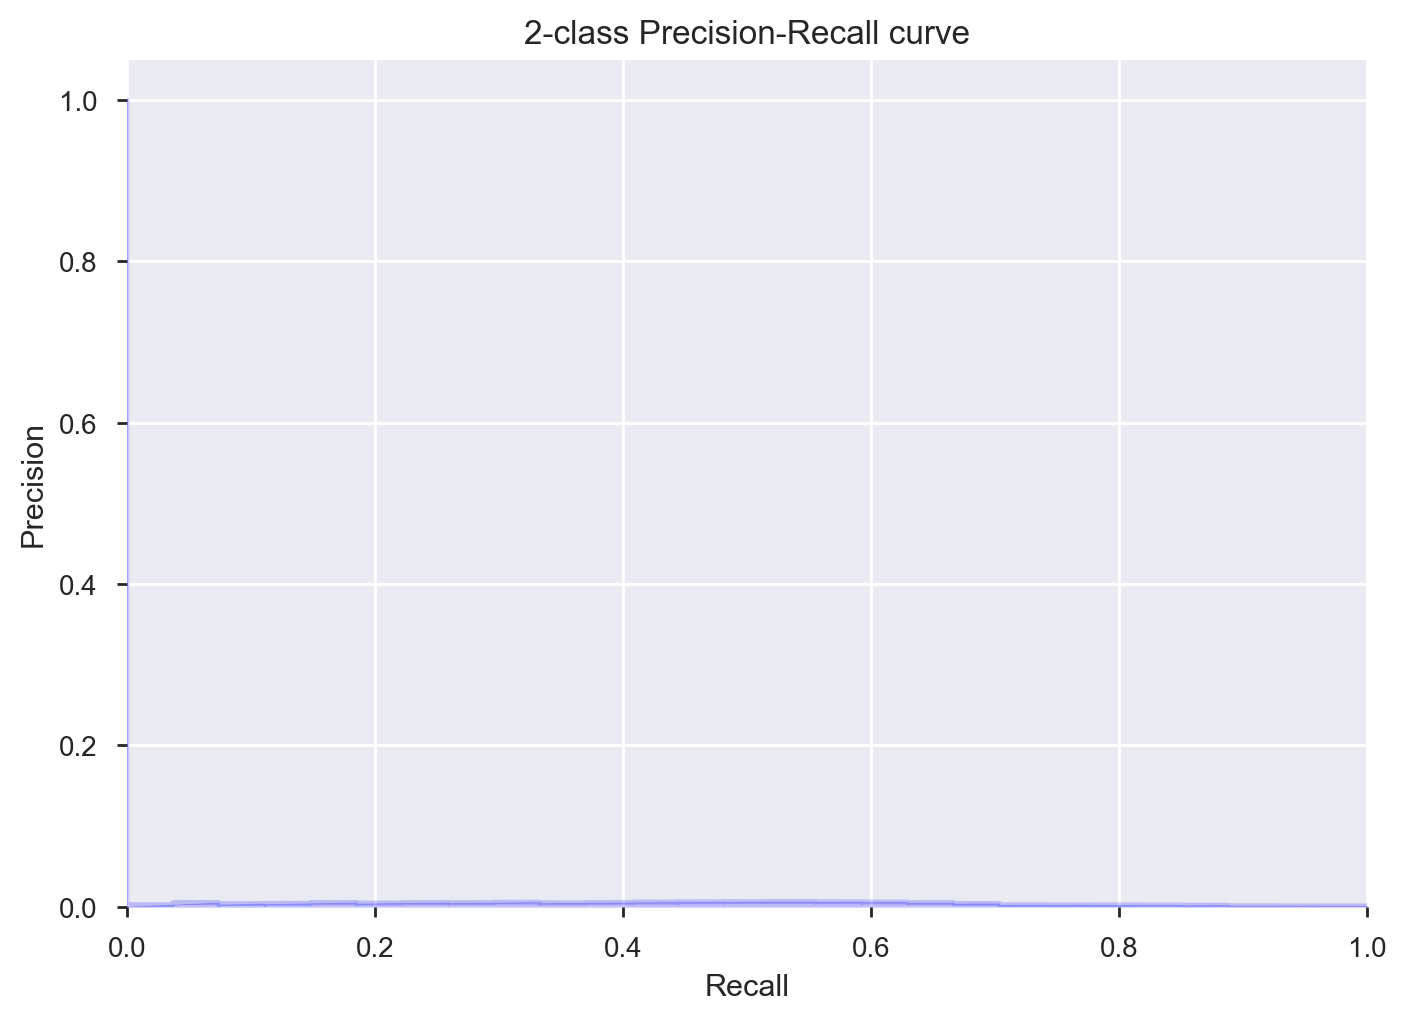

In [242]:
%time
name = 'XGBoost'
features = X_train_sampled_SMOTENC.columns
X = {'train': X_train_sampled_SMOTENC.as_matrix(), 'test':X_test[features].as_matrix()}
y = {'train': y_train_sampled_SMOTENC.as_matrix(), 'test':y_test.as_matrix()}

opt = HyperTuning.baysian_search(name, X['train'], y['train'])
HyperTuning.evaluate_opt(opt, X, y)


## XGBoost with SMOTENC Oversampling (metrics + day of week features)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.2min remaining:  6.3min


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.6min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.6min finished


Finished Training
Best model

Pipeline(memory=None,
     steps=[('clsfr', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.46909356296798244, gamma=7.277257431773251,
       learning_rate=0.008567773934012713, max_delta_step=1, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1472, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.4727067692369846))])


Best score on the validation: 0.9923786007233075
   mean_test_score  rank_test_score  \
0         0.992379                1   
1         0.983139                1   
2         0.965097                1   
3         0.982736                1   
4         0.990396                1   

                                              params  
0  {'clsfr__colsample_bytree': 0.4690935629679824...  
1  {'clsfr__colsample_bytree': 0.8536495199979559...  
2  {'cl

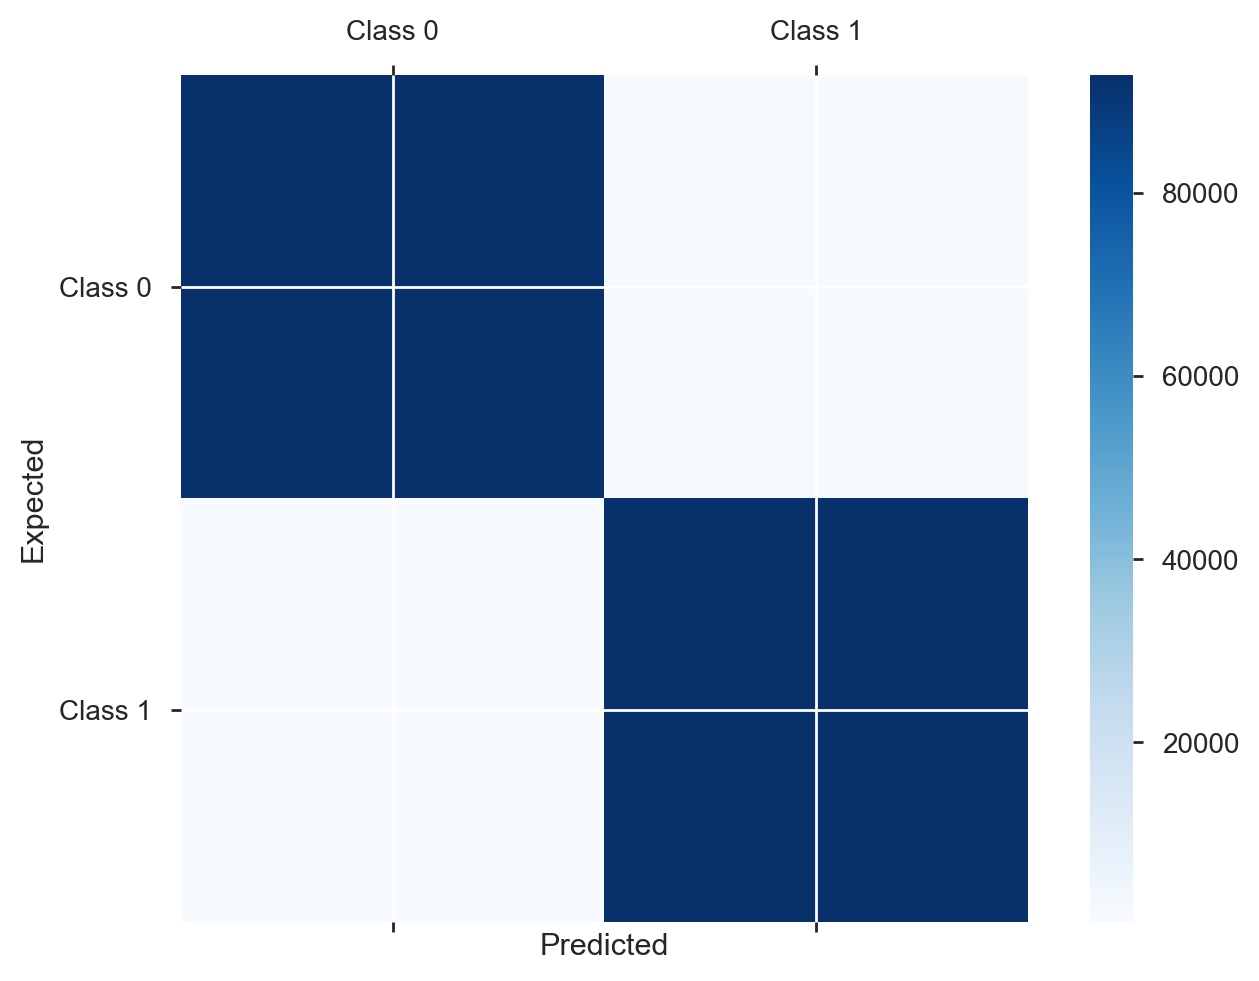

*****************Testing***************************


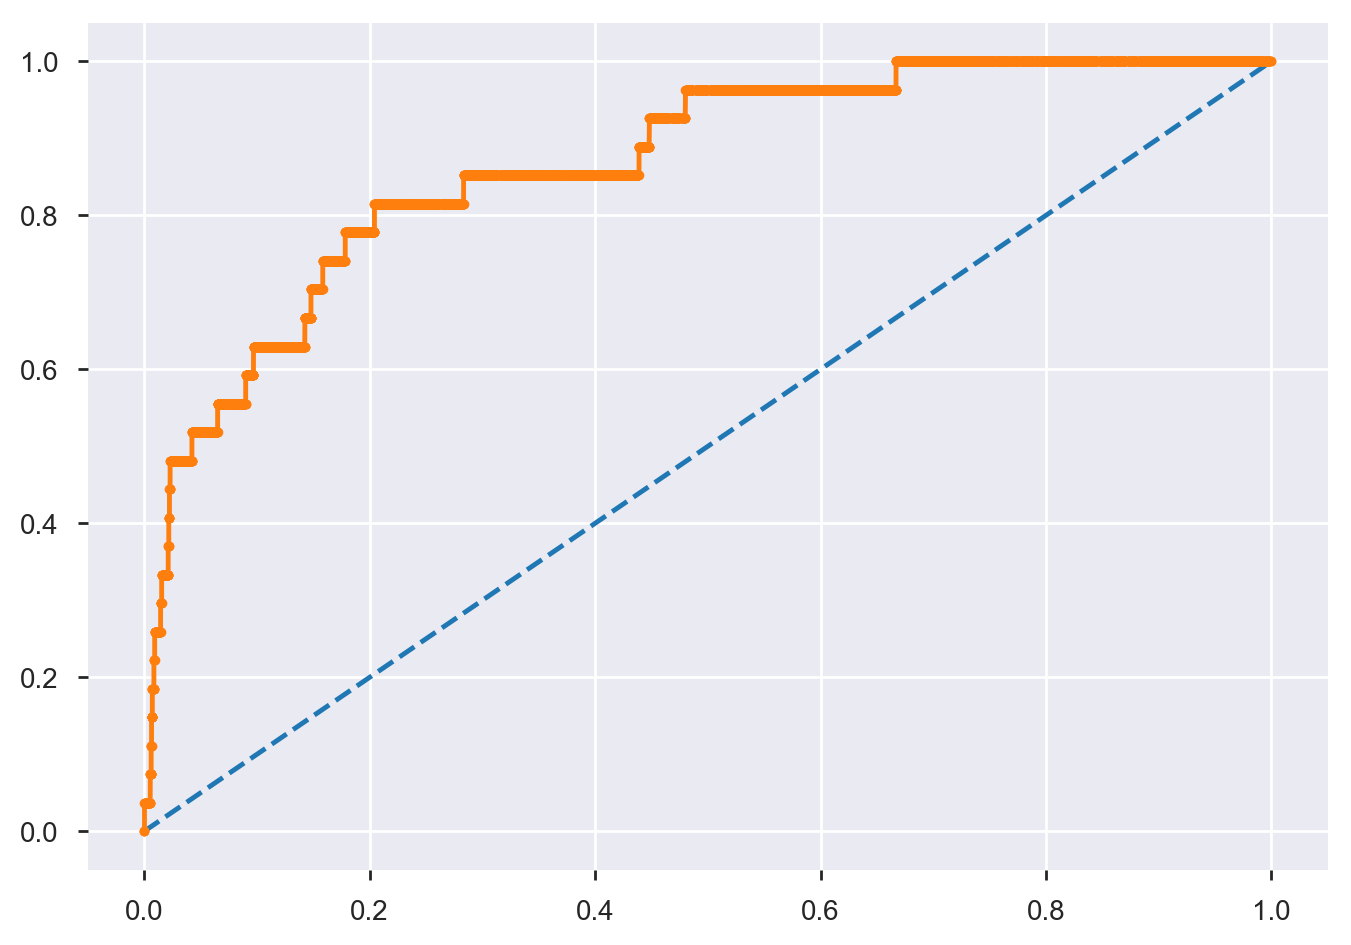

AUC: 0.866
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     31097
           1       0.02      0.26      0.04        27

   micro avg       0.99      0.99      0.99     31124
   macro avg       0.51      0.62      0.52     31124
weighted avg       1.00      0.99      0.99     31124


Accuracy 0.9893972497108341
Confusion matrix:
 [[30787   310]
 [   20     7]]


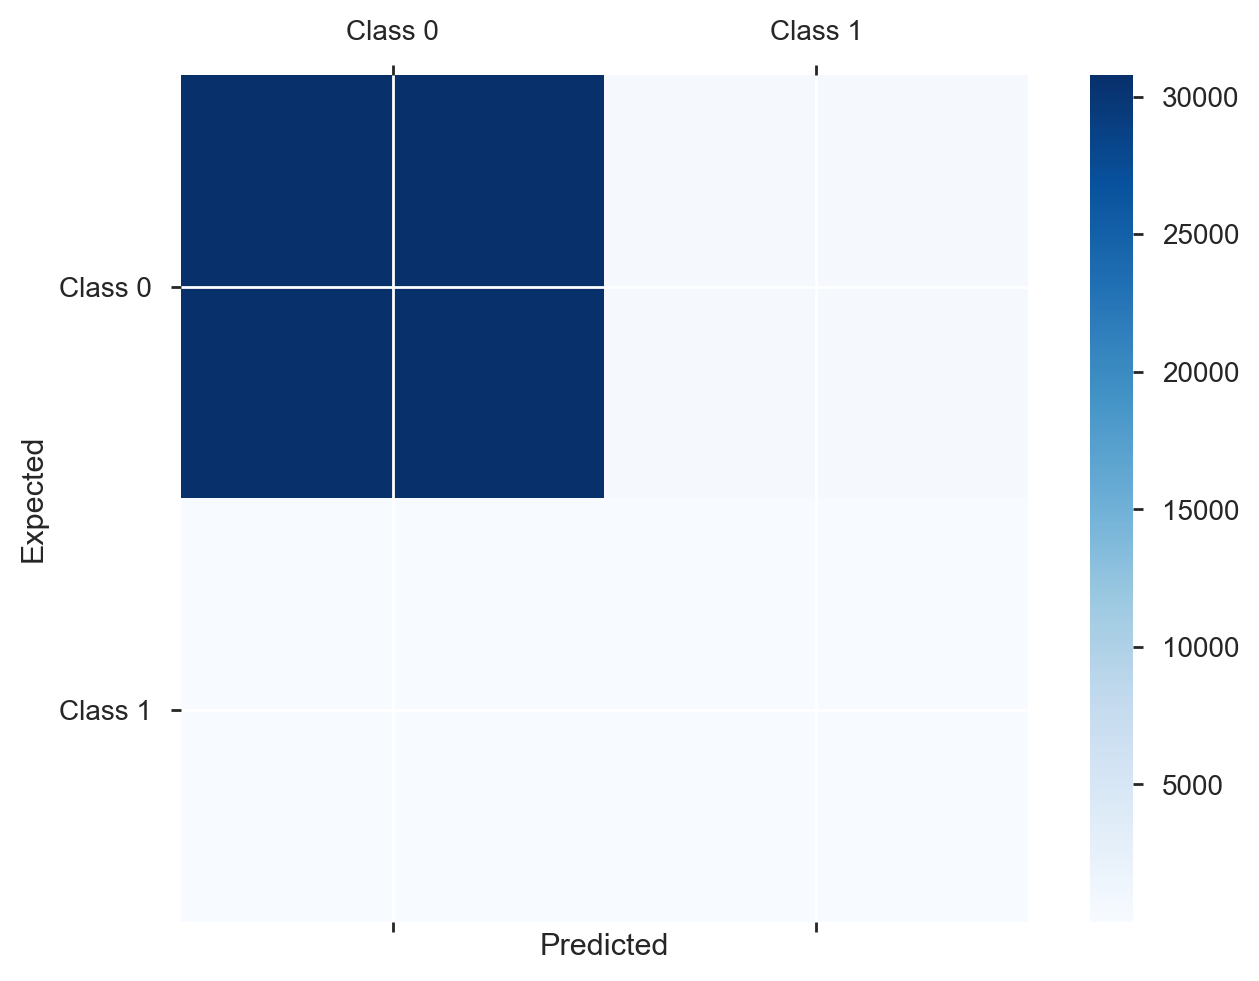

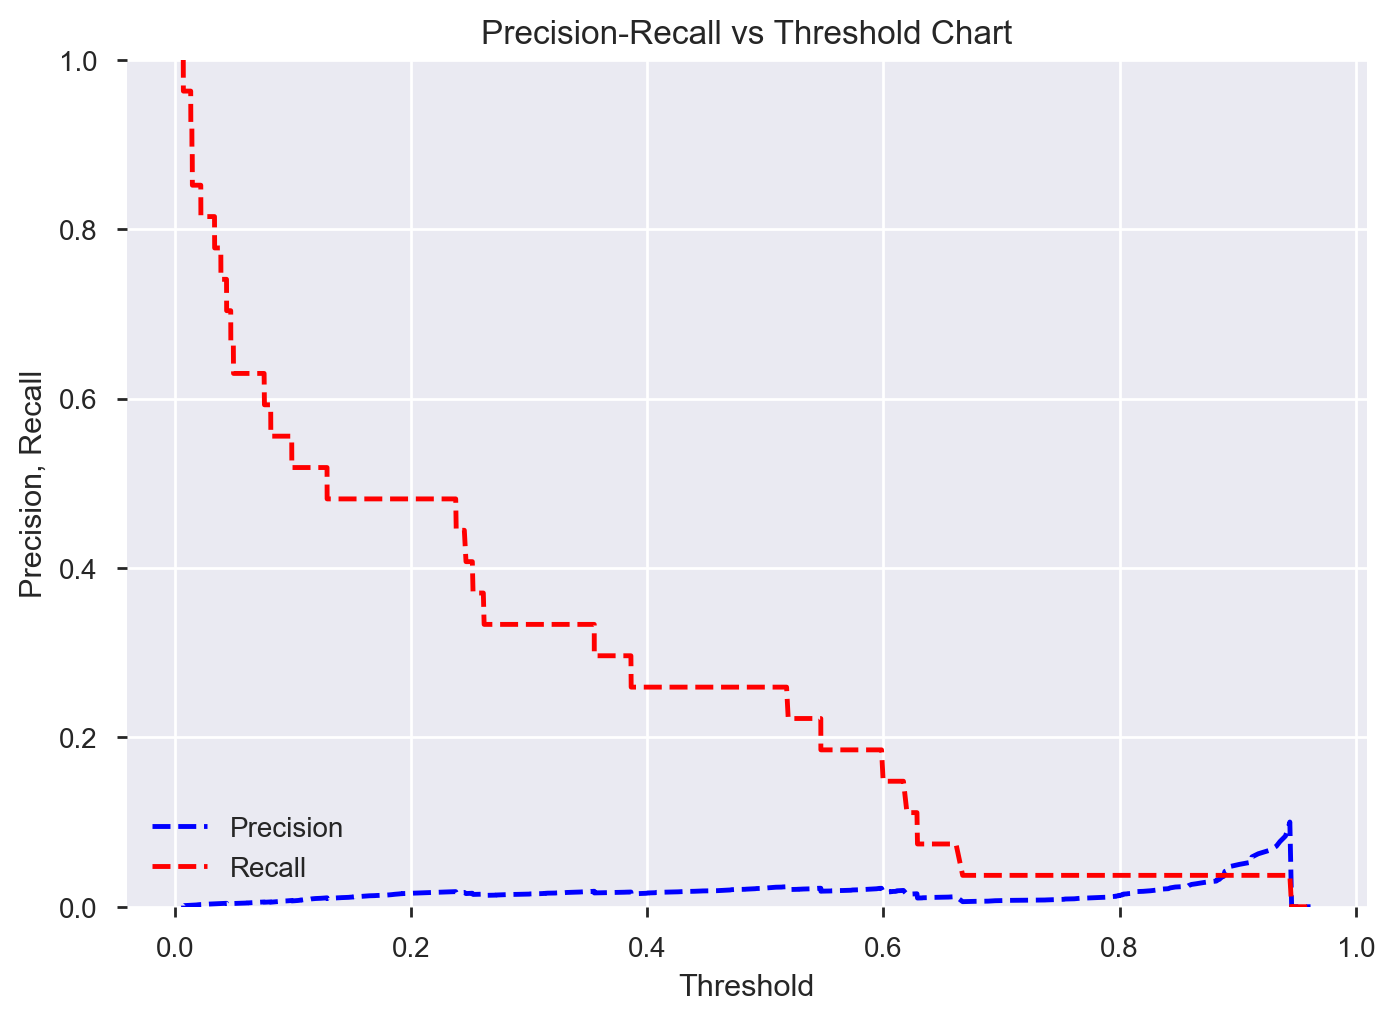

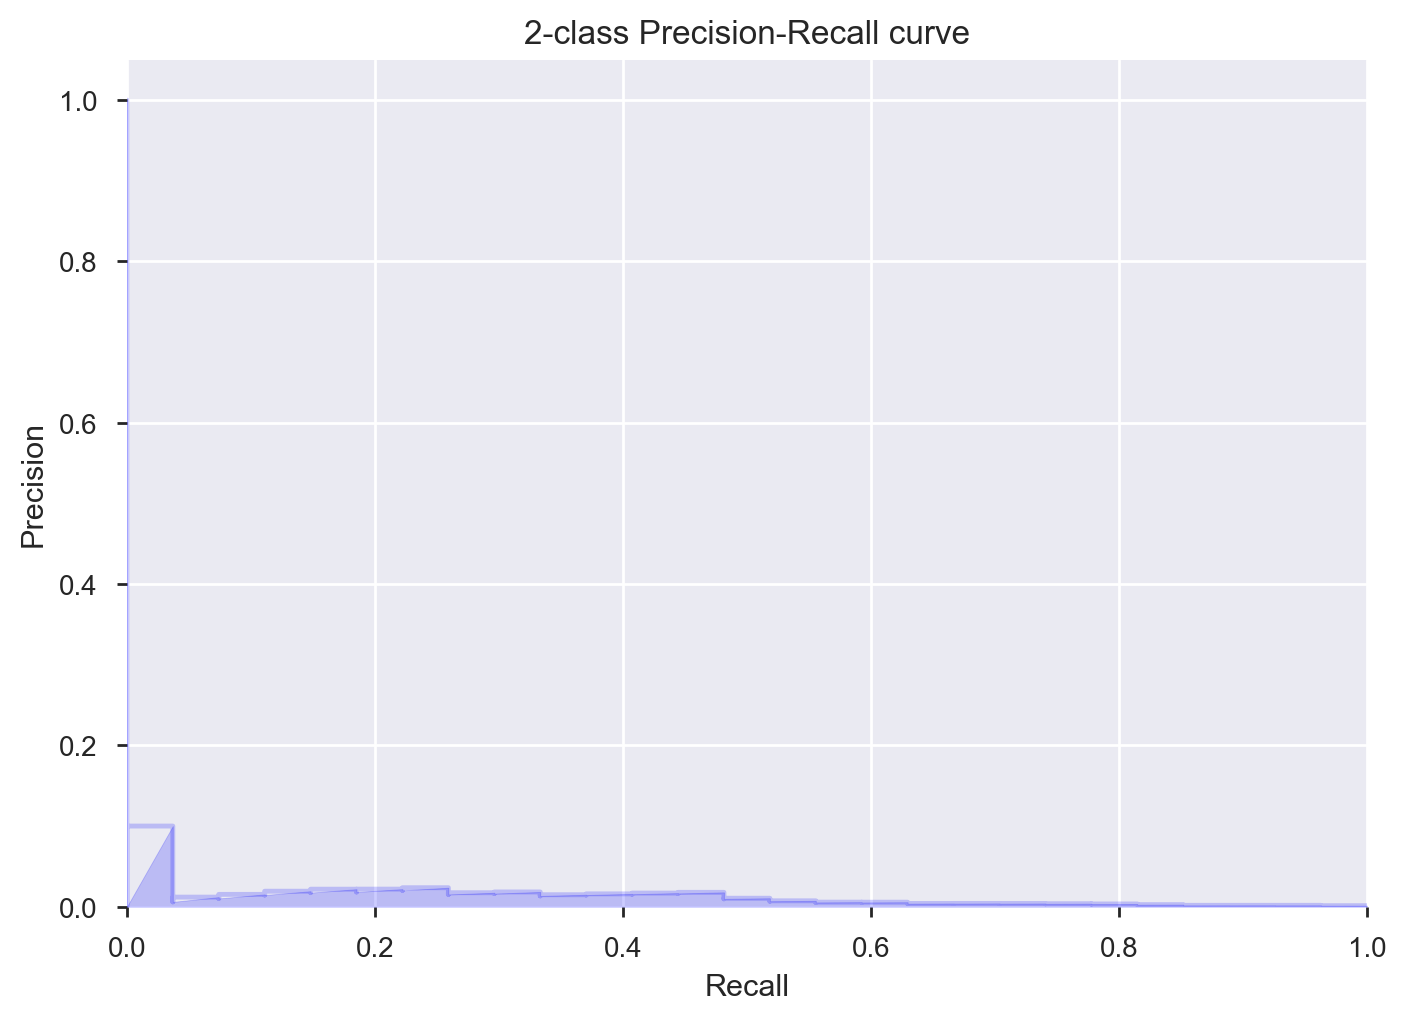

In [90]:
%time
name = 'XGBoost'
features = X_train_sampled_SMOTENC.columns.difference([c for c in X_train_sampled_SMOTENC.columns if 'month' in c])
features = features.difference(['id'])

X = {'train': X_train_sampled_SMOTENC[features].as_matrix(), 'test':X_test[features].as_matrix()}
y = {'train': y_train_sampled_SMOTENC.as_matrix(), 'test':y_test.as_matrix()}

opt = HyperTuning.baysian_search(name, X['train'], y['train'])
HyperTuning.evaluate_opt(opt, X, y)

## SageMaker Implementation
To do: implementing the container for sagemaker, to be done next couple of weeks